# Code for Examining Individual Fit Parameters from the Cosine Moment Extractions

In [1]:
%reset -f
import ROOT
import traceback
from MyCommonAnalysisFunction_richcap import *
from array import array

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(f"{color.BOLD}\nStarting RG-A SIDIS Analysis\n{color.END}")


Welcome to JupyROOT 6.22/06

Starting RG-A SIDIS Analysis



.

.

.

## Specify the Parameter text file to use:

In [2]:
# Define the relative path to the file
file_path = 'SIDIS_python_Images_From_5D_Unfold_Test_V6_5_21_2024/Parameters_5D_Unfold_Test_V6_5_21_2024_Q2_y_Bins_Combined.txt'  # Adjust the path based on your specific directory structure
file_path = 'SIDIS_python_Images_From_Sim_Test_Pass_2_5D_Unfold_Test_V6_5_24_2024/Parameters_Sim_Test_Pass_2_5D_Unfold_Test_V6_5_24_2024_Q2_y_Bins_Combined.txt'
file_path = 'Parameters_Pass_2_New_Sector_Cut_Test_V3_6_4_2024_Q2_y_Bins_3_Unsmeared.txt'

file_path = 'SIDIS_python_Images_From_Pass_2_New_Sector_Cut_Test_V10_6_14_2024/Parameters_Pass_2_New_Sector_Cut_Test_V10_6_14_2024_Q2_y_Bins_Combined.txt'

file_path = 'SIDIS_python_Images_From_Pass_2_New_Sector_Cut_Test_V12_7_9_2024/Parameters_Pass_2_New_Sector_Cut_Test_V12_7_9_2024_Q2_y_Bins_Combined.txt' # Only Includes Smearing

# Open the file and read its contents into a string
with open(file_path, 'r') as file:
    file_content = file.read()

print(f"{color.BOLD}File: {color.BLUE}{file_path}{color.END_B} has been found...{color.END}")

# # Now `file_content` holds the content of the file as a string
# print(file_content)  # Display the content to verify it's correct


File: SIDIS_python_Images_From_Pass_2_New_Sector_Cut_Test_V12_7_9_2024/Parameters_Pass_2_New_Sector_Cut_Test_V12_7_9_2024_Q2_y_Bins_Combined.txt has been found...


In [3]:
# print(file_content)  # Display the content to verify it's correct

.

.

.

## Declare Pass Version

In [4]:
Pass_Version = "Pass 1"
Pass_Version = "Pass 2" if(any(pass_V in str(file_path) for pass_V in ["Pass_2", "P2"])) else Pass_Version
# Pass_Version = "Pass 2"

print(f"\n{color.BOLD}Pass Version in use = {color.UNDERLINE}{Pass_Version}{color.END}\n")


Pass Version in use = Pass 2



.

.

.

### Remove User text
(Attempts to limit the lines of text included for humans reading the content of the loaded file so that the computer has an easier time searching through the file)

In [5]:
file_content = file_content.replace(f"This information is from {color.BOLD}{Pass_Version}{color.END}", "")
file_content = file_content.replace("""
Note to Reader: Print the text in this file as a string in Python for the best formatting...


""", "")

print(f"\n{color.BOLD}'file_content'{color.END} has been updated\n")


'file_content' has been updated



.

.

.

In [6]:
# def extract_histogram_info(block, histogram_type):
#     pattern = rf"\(\*\) {re.escape(histogram_type)} Histograms:(.*?)(?=\(\*\)|$)"
#     match = re.search(pattern, block, re.DOTALL)
#     if(match):
#         return match.group(1).strip()
#     else:
#         return "No data found for the specified histogram type."

# block = """For Q2-y Bin 3 - z-PT Bin 1: 
#      (*) 1D Histograms:
#      - Bin-by-Bin Correction Fits:
#              Par A    = 13486.068651293246 ± 54.70518618985534
#              Par B    = -0.08165271387166789 ± 0.005685585802843861
#              Par C    = 0.031354864785378384 ± 0.005653182085145293
#              chi2/NDF = 8.1961606104412
#      - Bayesian Unfolding Fits:
#              Par A    = 13941.171993298445 ± 85.64670061373363
#              Par B    = -0.08593225635958629 ± 0.008326754543945727
#              Par C    = 0.027749049170228628 ± 0.008161871933343137
#              chi2/NDF = 8.039574428843164
#      - Generated Plot Fits:
#              Par A    = 3281.6052095412715 ± 11.693213232322705
#              Par B    = 0.0015283478118269472 ± 0.0008860486093057907
#              Par C    = 0.00799254726191877 ± 0.005900899459140923
#              chi2/NDF = 1.0702373297695
#      (*) 1D (pipsec 1) Histograms:
#      - Bin-by-Bin Correction Fits:
#              Par A    = 2287.1860384785923 ± 53.87622224466281
#              Par B    = -0.10488598521460385 ± 0.030987473593416803
#              Par C    = 0.04439845524906173 ± 0.03329647340756958
#              chi2/NDF = 0.8207842620741114
#      - Bayesian Unfolding Fits:
#              Par A    = 2287.1860384785923 ± 53.87622224466281
#              Par B    = -0.10488598521460385 ± 0.030987473593416803
#              Par C    = 0.04439845524906173 ± 0.03329647340756958
#              chi2/NDF = 0.8207842620741114
#      - Generated Plot Fits:
#              Par A    = 546.0954045256018 ± 4.769870072131425
#              Par B    = 0.019408575607271 ± 0.014351610748536957
#              Par C    = 0.020489649964164684 ± 0.015036170802304032
#              chi2/NDF = 1.4623952555983086"""
# print(extract_histogram_info(block, histogram_type="1D (pipsec 1)"))
# print(extract_histogram_info(block, histogram_type="1D"))

## Defining Search Functions

In [6]:
def find_bin_block(data, bin_info):
    blocks = re.split(r"==+\n", data)
    for block in blocks:
        if(bin_info in block):
            if((("SMEARED" in bin_info) and ("SMEARED" in block)) or (("SMEARED" not in bin_info) and ("SMEARED" not in block))):
                return f"\n======================================================================\n{block.strip()}\n======================================================================\n"
    return "No data found for the specified Q2-y/z-PT Bin."


def extract_histogram_info(block, histogram_type):
    # pattern = rf"{histogram_type} Histograms:(.*?)(?=\(\*\)|\dD Histograms)"
    pattern = rf"\(\*\) {re.escape(histogram_type)} Histograms:(.*?)(?=\(\*\)|$)"
    match = re.search(pattern, block, re.DOTALL)
    if(match):
        return match.group(1).strip()
    else:
        return "No data found for the specified histogram type."
    

def extract_fit_info(block, fit_type):
    pattern = rf"- {re.escape(fit_type)} Fits:.*?(\n\s+Par A.*?chi2/NDF = \S+)"
    match = re.search(pattern, block, re.DOTALL)
    if(match):
        return f"\n{match.group(1).strip()}"
    else:
        return "No fit details found for the specified type."

    
# def find_parameter(block, parameter, return_err=False):
#     for line in block.split("\n"):
#         if(parameter in line):
#             par_val = (line.split("="))[1]
#             par_val = re.sub(r"{}.*".format(re.escape("±")), "", par_val)
#             return par_val
#     return "ERROR"

def find_parameter(block, parameter, return_err=False):
    for line in block.split("\n"):
        if(parameter in line):
            try:
                # Split the line at "=", then trim whitespace around the parts
                _, par_info = line.split("=")
                par_val, par_err = map(str.strip, par_info.split("±"))
                if(return_err):
                    return par_val, par_err
                else:
                    return par_val
            except ValueError:
                # If splitting fails, likely due to missing '=' or '±'
                continue
    if(return_err):
        return "ERROR", "ERROR"
    else:
        return "ERROR"
            
def Full_Search_Parameter(Parameter_File_str, Bin_Info=False, Histogram_Type=False, Fit_Type=False, Parameter=False, return_err=False):
    Output = "Error"
    if(not Bin_Info):
        print("No kinematic bin given")
        return Parameter_File_str
    else:
        Output = find_bin_block(Parameter_File_str, Bin_Info)
        if(not Histogram_Type):
            print("No histogram given")
            return Output
        else:
            if(Histogram_Type not in ["Skip"]):
                Output = extract_histogram_info(Output, Histogram_Type)
            if(not Fit_Type):
                print("No fit given")
                return Output
            else:
                Output = extract_fit_info(Output, Fit_Type)
                if(not Parameter):
                    print("No parameter given")
                    return Output
                else:
                    Output = find_parameter(Output, Parameter, return_err)
                    return Output
    return Output
    
print("Done making search functions")

Done making search functions


.

.

.

# Create string of C++ Code for the Moment measurements

In [7]:
if(not True):
    String_Print_Cpp = """
    float Moment_Measurement[18][37][2][2];

        // Moment_Measurement[Q2_y_Bin][z_pT_Bin][Moment_Num][Smear_Num]
        // Moment_Num = 0 -> Cos(phi)   (Fit Par B)
        // Moment_Num = 1 -> Cos(2*phi) (Fit Par C)
        // Smear_Num  = 0 -> NOT Smeared
        // Smear_Num  = 1 -> Smeared"""
    for Q2_y_Bin in range(1, 18):
        if(Q2_y_Bin > 1):
            String_Print_Cpp = f"{String_Print_Cpp}\n"
        for z_pT_Bin in range(1, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1] + 1):
            Num_Spaces  = " "
            for ii in [Q2_y_Bin, z_pT_Bin]:
                if(ii < 10):
                    Num_Spaces += " "
            for Smearing in ["SMEARED ", ""]:
                String_Print_Cpp = f"{String_Print_Cpp}\n"
                if(Smearing in ["SMEARED "]):
                    Smear_Num = "1"
                    String_Print_Cpp = f"{String_Print_Cpp}\n// (Q2-y) + (z-pT) Bin: ({Q2_y_Bin}) + ({z_pT_Bin})"
                else:
                    Smear_Num = "0"
                Bin___Type = f"{Smearing}Q2-y Bin {Q2_y_Bin} - z-PT Bin {z_pT_Bin}"
                Histo_Type = "1D"
                Fit___Type = "Bin-by-Bin Correction"
                if(skip_condition_z_pT_bins(Q2_Y_BIN=Q2_y_Bin, Z_PT_BIN=z_pT_Bin, BINNING_METHOD="Y_bin")):
                    for Par___Type in ["B", "C"]:
                        # Moment_Value = "-0.1500" if(Par___Type in ["B"]) else "0.005"
                        Moment_Value = "N/A" if(Par___Type in ["B"]) else "N/A"
                        Moment_Num   =  0        if(Par___Type in ["B"]) else 1
                        String_Print_Cpp = f"""{String_Print_Cpp}
    Moment_Measurement[{Q2_y_Bin}][{z_pT_Bin}][{Moment_Num}][{Smear_Num}]{Num_Spaces}=  {Moment_Value};"""
                else:
                    for Par___Type in ["B", "C"]:
                        Moment_Value = Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type, Histogram_Type=Histo_Type, Fit_Type=Fit___Type, Parameter=Par___Type)
                        Moment_Value = str(round(float(Moment_Value), 5))
                        Moment_Num = 0 if(Par___Type in ["B"]) else 1
                        String_Print_Cpp = f"""{String_Print_Cpp}
    Moment_Measurement[{Q2_y_Bin}][{z_pT_Bin}][{Moment_Num}][{Smear_Num}]{Num_Spaces}=  {Moment_Value};"""

    String_Print_Cpp = f"{String_Print_Cpp}\n"
    String_Print_Cpp = String_Print_Cpp.replace(";\n", "; \t")
    String_Print_Cpp = String_Print_Cpp.replace("  -",  " -")
    # String_Print_Cpp = String_Print_Cpp.replace("  ",   " ")


    print(f"\n{String_Print_Cpp}\n")

    # String_Print_python = String_Print_Cpp.replace("""float Moment_Measurement[18][37][2]; 	
    #     // Moment_Measurement[Q2_y_Bin][z_pT_Bin][Moment_Num]
    #     // Moment_Num = 0 -> Cos(phi)   (Fit Par B)
    #     // Moment_Num = 1 -> Cos(2*phi) (Fit Par C)
    #
    # """, "")
    # String_Print_python = String_Print_python.replace("][", ", ")
    # String_Print_python = String_Print_python.replace("[", "['")
    # String_Print_python = String_Print_python.replace("]", "']")
    # String_Print_python = String_Print_python.replace("; \t", "\n")
    # print(String_Print_python)
else:
    print(f"\n{color.Error}Choose not to run this cell...\n{color.END}")


Choose not to run this cell...



.

.

.

In [30]:
# # Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type__S, Histogram_Type=Histo_Type, Fit_Type=Fit___Type, Parameter=Par___Type)
# Histo_Type = "Skip"
# # Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type__S, Histogram_Type=Histo_Type, Fit_Type=Fit___Type, Parameter=Par___Type)
# print(f"Bin___Type__S = {Bin___Type__S}")
# print(f"Histo_Type    = {Histo_Type}")
# print(f"Fit___Type    = {Fit___Type}")
# print(f"Par___Type    = {Par___Type}")

# Bin___Type__NS = Bin___Type__S.replace("SMEARED ", "")

# Bin___Type = Bin___Type__NS
# print(f"Bin___Type = {Bin___Type}")

# print(Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type))
# print("-----------------------------------------------------------------------------------------------------------------------------------------------")
# print(Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type, Histogram_Type=Histo_Type))
# print("-----------------------------------------------------------------------------------------------------------------------------------------------")
# print(Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type, Histogram_Type=Histo_Type, Fit_Type=Fit___Type))
# print("-----------------------------------------------------------------------------------------------------------------------------------------------")
# print(Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type, Histogram_Type=Histo_Type, Fit_Type=Fit___Type, Parameter=Par___Type))

# Comparison between Fits

## Compare Smearing

In [29]:
if(not True):
    Histo_Type = "1D"
    Histo_Type = "Skip"
    Fit___Type = "Bin-by-Bin Correction"
    Parameters_to_Compare = ["B", "C"]

    Comparison_Output = {}
    Comparison_Output["Title"] = ["Q2-y-z-PT Bin", "Fit Parameter",  "Unsmeared\t\t", "Unsmeared Error\t\t", "Smeared\t\t", "Smeared Error\t\t", "Absolute Dif\t", "Percent Dif\t\t"]
    # Comparison_Output["Title2"] = ["Bin 18-35\t",  "Parameter B\t ", "0.15\t",    "0.16\t",   "0.01\t", "6.7%\t"]
    # Comparison_Output["Title3"] = ["Bin 1-1\t",    "Parameter C\t ", "0.15\t",    "0.16\t",   "0.01\t", "6.7%\t"]
    for Q2_y_Bin               in range(1, 18):
        for z_pT_Bin           in range(1, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1] + 1):
            if(skip_condition_z_pT_bins(Q2_Y_BIN=Q2_y_Bin, Z_PT_BIN=z_pT_Bin, BINNING_METHOD="Y_bin")):
                continue
            Bin___Type__S = f"SMEARED Q2-y Bin {Q2_y_Bin} - z-PT Bin {z_pT_Bin}"
            Bin___Type_NS = f"Q2-y Bin {Q2_y_Bin} - z-PT Bin {z_pT_Bin}"
            for Par___Type in Parameters_to_Compare:
                Moment_Value__S, Moment_Value__S_Error = Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type__S, Histogram_Type=Histo_Type, Fit_Type=Fit___Type, Parameter=Par___Type, return_err=True)
                Moment_Value_NS, Moment_Value_NS_Error = Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type_NS, Histogram_Type=Histo_Type, Fit_Type=Fit___Type, Parameter=Par___Type, return_err=True)
                # if(("ERROR" in [Moment_Value__S, Moment_Value_NS]) or ("<class 'str'>" in [str(type(Moment_Value__S)), str(type(Moment_Value_NS))])):
                if("ERROR" in [Moment_Value__S, Moment_Value__S_Error, Moment_Value_NS, Moment_Value_NS_Error]):
                    print(f"{color.Error}{Bin___Type_NS}{color.END}")
                    print(f"{color.Error}Moment_Value__S       = {Moment_Value__S}{color.END}")
                    print(f"{color.Error}Moment_Value__S_Error = {Moment_Value_NS_Error}{color.END}")
                    print(f"{color.Error}Moment_Value_NS       = {Moment_Value_NS}{color.END}")
                    print(f"{color.Error}Moment_Value__S_Error = {Moment_Value_NS_Error}{color.END}")
                    Absolute_Dif, Percent__Dif = "ERROR", "ERROR"
                else:
                    Moment_Value__S = float(Moment_Value__S)
                    Moment_Value_NS = float(Moment_Value_NS)
                    Absolute_Dif = Moment_Value__S - Moment_Value_NS
                    Percent__Dif = abs((abs(Absolute_Dif)/Moment_Value_NS)*100)
                    Absolute_Dif = round(Absolute_Dif,       9)
                    Percent__Dif = round(Percent__Dif,       9)
                    if(Percent__Dif > 10):
                        Percent__Dif = f"{color.RED}{Percent__Dif}"
                    Moment_Value__S       = round(Moment_Value__S,       9)
                    Moment_Value__S_Error = round(float(Moment_Value__S_Error), 9)
                    Moment_Value_NS       = round(Moment_Value_NS,       9)
                    Moment_Value_NS_Error = round(float(Moment_Value_NS_Error), 9)
                Comparison_Output[f"Par {Par___Type} - ({Q2_y_Bin}, {z_pT_Bin})"] = [f"Bin {Q2_y_Bin}-{z_pT_Bin}\t", f"Parameter {Par___Type}\t ", f"{Moment_Value__S}   \t", f"{Moment_Value__S_Error}   \t", f"{Moment_Value_NS}   \t", f"{Moment_Value_NS_Error}   \t", f"{Absolute_Dif}   \t", f"{Percent__Dif}%  \t"]

    print(f"\n{color.BOLD}Printing Table of Results for {color.UNDERLINE}({Histo_Type}) {Fit___Type}{color.END}")

    full_table_print = ""
    for ii in Comparison_Output:
        Line_Info = Comparison_Output[ii]
        if(ii in ["Title"]):
            print("==========================================================================================================================================")
        full_table_print = "".join([full_table_print, "\n", "" if(color.Error not in str(Line_Info[5])) else color.Error, f"{Line_Info[0]} || {Line_Info[1]} || {Line_Info[2]} || {Line_Info[3]} || {Line_Info[4]} || {Line_Info[5]}\t|| {Line_Info[6]} || {Line_Info[7]}\t||{color.END}"])
    #     print("".join(["" if(color.Error not in str(Line_Info[5])) else color.Error, f"|| {Line_Info[0]} || {Line_Info[1]} || {Line_Info[2]} || {Line_Info[3]}   || {Line_Info[4]} || {Line_Info[5]}\t||{color.END}"]))
    #     print("------------------------------------------------------------------------------------------------------------------------------------------")

    full_table_print = full_table_print.replace("\t", "   ")
    while("  " in full_table_print):
        full_table_print = full_table_print.replace("  ", " ")

    full_table_print = full_table_print.replace("||", ";")
    print(full_table_print)
else:
    print(f"\n{color.Error}Choose not to run this cell...\n{color.END}")


Printing Table of Results for (Skip) Bin-by-Bin Correction

Q2-y-z-PT Bin ; Fit Parameter ; Unsmeared ; Unsmeared Error ; Smeared ; Smeared Error ; Absolute Dif ; Percent Dif ;
Bin 1-1 ; Parameter B ; -0.132929778 ; 0.013132335 ; -0.135589958 ; 0.013146778 ; 0.00266018 ; 1.961929997% ;
Bin 1-1 ; Parameter C ; -0.00305623 ; 0.00189224 ; -0.004273541 ; 0.003040168 ; 0.00121731 ; 28.484819508% ;
Bin 1-2 ; Parameter B ; -0.044003771 ; 0.000453156 ; -0.057181613 ; 0.000494525 ; 0.013177842 ; 23.04559326% ;
Bin 1-2 ; Parameter C ; 0.073203347 ; 0.004992462 ; 0.066281461 ; 0.005021543 ; 0.006921886 ; 10.443170195% ;
Bin 1-3 ; Parameter B ; -0.259689811 ; 0.012634835 ; -0.259019433 ; 0.012642005 ; -0.000670378 ; 0.258813957% ;
Bin 1-3 ; Parameter C ; -0.0291128 ; 0.007938319 ; -0.027232231 ; 0.007294805 ; -0.00188057 ; 6.905675684% ;
Bin 1-4 ; Parameter B ; -0.110948217 ; 0.000198465 ; -0.127365828 ; 0.000225913 ; 0.016417611 ; 12.890122449% ;
Bin 1-4 ; Parameter C ; 0.069468956 ; 0.004808965

.

.

## Compare Methods

In [169]:
if(not True):
    Histo_Type = "1D"
    Smear_Type = "SMEARED "
    Smear_Type = ""
    Parameters_to_Compare = ["B", "C"]

    Fit___Type_to_Compare = ["Bin-by-Bin Correction", "Generated Plot"]
    # Fit___Type_to_Compare = ["Bin-by-Bin Correction", "Bayesian Unfolding"]

    Comparison_Output = {}
    Comparison_Output["Title"] = ["Q2-y-z-PT Bin", "Fit Parameter",  f"{Fit___Type_to_Compare[0]}\t".replace("Correction", ""), f"{Fit___Type_to_Compare[1]}\t".replace("Correction", ""), "Absolute Dif\t", "Percent Dif\t\t"]
    # Comparison_Output["Title2"] = ["Bin 18-35\t",  "Parameter B\t ", "0.15\t",    "0.16\t",   "0.01\t", "6.7%\t"]
    # Comparison_Output["Title3"] = ["Bin 1-1\t",    "Parameter C\t ", "0.15\t",    "0.16\t",   "0.01\t", "6.7%\t"]
    for Q2_y_Bin               in range(1, 18):
        for z_pT_Bin           in range(1, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1] + 1):
            if(skip_condition_z_pT_bins(Q2_Y_BIN=Q2_y_Bin, Z_PT_BIN=z_pT_Bin, BINNING_METHOD="Y_bin")):
                continue
            Bin___Type = f"{Smear_Type}Q2-y Bin {Q2_y_Bin} - z-PT Bin {z_pT_Bin}"
            for Par___Type in Parameters_to_Compare:
                Moment_Value_F1 = Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type, Histogram_Type=Histo_Type, Fit_Type=Fit___Type_to_Compare[0], Parameter=Par___Type)
                Moment_Value_F2 = Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type, Histogram_Type=Histo_Type, Fit_Type=Fit___Type_to_Compare[1], Parameter=Par___Type)
                Moment_Value_F1 = float(Moment_Value_F1)
                Moment_Value_F2 = float(Moment_Value_F2)
                Absolute_Dif = Moment_Value_F1 - Moment_Value_F2
                Percent__Dif = abs((abs(Absolute_Dif)/Moment_Value_F2)*100)
                Absolute_Dif = round(Absolute_Dif,       9)
                Percent__Dif = round(Percent__Dif,       9)
                if(Percent__Dif > 25):
                    Percent__Dif = f"{color.Error}{Percent__Dif}"
                Moment_Value_F1 = round(Moment_Value_F1, 9)
                Moment_Value_F2 = round(Moment_Value_F2, 9)
                Comparison_Output[f"Par {Par___Type} - ({Q2_y_Bin}, {z_pT_Bin})"] = [f"Bin {Q2_y_Bin}-{z_pT_Bin}\t", f"Parameter {Par___Type}\t ", f"{Moment_Value_F1}   \t", f"{Moment_Value_F2}   \t", f"{Absolute_Dif}   \t", f"{Percent__Dif}%  \t"]

    print(f"\n{color.BOLD}Printing Table of Results between ({Histo_Type}) {color.UNDERLINE}{Fit___Type_to_Compare[0]}{color.END_B} and {color.UNDERLINE}{Fit___Type_to_Compare[1]}{color.END}")

    full_table_print = ""
    for ii in Comparison_Output:
        Line_Info = Comparison_Output[ii]
        if(ii in ["Title"]):
            print("==========================================================================================================================================")
        full_table_print = "".join([full_table_print, "\n", "" if(color.Error not in str(Line_Info[5])) else color.Error, f"{Line_Info[0]} || {Line_Info[1]} || {Line_Info[2]} || {Line_Info[3]}   || {Line_Info[4]} || {Line_Info[5]}\t||{color.END}"])
    #     print("".join(["" if(color.Error not in str(Line_Info[5])) else color.Error, f"|| {Line_Info[0]} || {Line_Info[1]} || {Line_Info[2]} || {Line_Info[3]}   || {Line_Info[4]} || {Line_Info[5]}\t||{color.END}"]))
    #     print("------------------------------------------------------------------------------------------------------------------------------------------")

    full_table_print = full_table_print.replace("\t", "   ")
    while("  " in full_table_print):
        full_table_print = full_table_print.replace("  ", " ")

    full_table_print = full_table_print.replace("||", ";")
    print(full_table_print)
else:
    print(f"\n{color.Error}Choose not to run this cell...\n{color.END}")


Printing Table of Results between (1D) Bin-by-Bin Correction and Generated Plot

Q2-y-z-PT Bin ; Fit Parameter ; Bin-by-Bin ; Generated Plot ; Absolute Dif ; Percent Dif ;
Bin 1-1 ; Parameter B ; 0.002397199 ; 0.004371322 ; -0.001974123 ; 45.160776017% ;
Bin 1-1 ; Parameter C ; -0.003914275 ; -0.001535143 ; -0.002379132 ; 154.977855102% ;
Bin 1-2 ; Parameter B ; 0.00026262 ; -0.003819616 ; 0.004082236 ; 106.875568165% ;
Bin 1-2 ; Parameter C ; 0.007525246 ; 0.003664438 ; 0.003860808 ; 105.358794804% ;
Bin 1-3 ; Parameter B ; 0.00641398 ; -0.001748223 ; 0.008162203 ; 466.88577376% ;
Bin 1-3 ; Parameter C ; 0.004266343 ; -0.003862156 ; 0.008128499 ; 210.465310603% ;
Bin 1-4 ; Parameter B ; -0.004524674 ; 0.004646369 ; -0.009171044 ; 197.380854613% ;
Bin 1-4 ; Parameter C ; -0.008117244 ; -0.000768555 ; -0.00734869 ; 956.169728832% ;
Bin 1-5 ; Parameter B ; -0.005742178 ; -0.00480528 ; -0.000936898 ; 19.497266205% ;
Bin 1-5 ; Parameter C ; 0.002382784 ; 0.002483529 ; -0.000100744 ; 4.056

.

.

## Compare Dimensions/Sectors

In [ ]:
if(not True):
    # Histo_Type = "1D"
    Smear_Type = "SMEARED "
    Smear_Type = ""
    Fit___Type = "Bin-by-Bin Correction"
    Parameters_to_Compare = ["B", "C"]

    Histo_Type_to_Compare = ["1D", "1D (pipsec 1)", "1D (pipsec 2)", "1D (pipsec 3)", "1D (pipsec 4)", "1D (pipsec 5)", "1D (pipsec 6)"]
    # Histo_Type_to_Compare = ["1D (pipsec 1)", "1D (pipsec 2)", "1D (pipsec 3)", "1D (pipsec 4)", "1D (pipsec 5)", "1D (pipsec 6)"]

    Comparison_Output = {}
    Comparison_Output_Title = ["Q2-y-z-PT Bin", "Fit Parameter"]
    for compare in Histo_Type_to_Compare:
        Comparison_Output_Title.append(f"{compare}\t || {compare} Error")
    Comparison_Output["Title"] = Comparison_Output_Title
    del Comparison_Output_Title
    for Q2_y_Bin               in range(1, 18):
    # for Q2_y_Bin               in range(3, 4):
        for z_pT_Bin           in range(1, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1] + 1):
            if(skip_condition_z_pT_bins(Q2_Y_BIN=Q2_y_Bin, Z_PT_BIN=z_pT_Bin, BINNING_METHOD="Y_bin")):
                continue
            Bin___Type = f"{Smear_Type}Q2-y Bin {Q2_y_Bin} - z-PT Bin {z_pT_Bin}"
            for Par___Type in Parameters_to_Compare:
                Line_to_Add = [f"Bin {Q2_y_Bin}-{z_pT_Bin}\t", f"Parameter {Par___Type}\t "]
                for Histo_Type in Histo_Type_to_Compare:
                    Moment_Value_val, Moment_Value_err = Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type, Histogram_Type=Histo_Type, Fit_Type=Fit___Type, Parameter=Par___Type, return_err=True)
                    if(Moment_Value_val not in ["ERROR"]):
                        Moment_Value_val = round(float(Moment_Value_val), 9)
                    if(Moment_Value_err not in ["ERROR"]):
                        Moment_Value_err = round(float(Moment_Value_err), 9)
                    Line_to_Add.append(f"{Moment_Value_val}   \t|| {Moment_Value_err}   \t")
                Comparison_Output[f"Par {Par___Type} - ({Q2_y_Bin}, {z_pT_Bin})"] = Line_to_Add

    print(f"\n{color.BOLD}Printing Table of Results between ({Fit___Type}):")
    for ii in Histo_Type_to_Compare:
        print(f"{color.UNDERLINE}{ii}{color.END_B}")

    full_table_print = ""
    for ii in Comparison_Output:
        Line_Info = Comparison_Output[ii]
    #     print(f"Comparison_Output[{ii}] = {Line_Info}\n")
        if(ii in ["Title"]):
            print("==========================================================================================================================================")
        full_table_print = "".join([full_table_print, "\n", "||".join(Line_Info)])
    #     print("".join(["" if(color.Error not in str(Line_Info[5])) else color.Error, f"|| {Line_Info[0]} || {Line_Info[1]} || {Line_Info[2]} || {Line_Info[3]}   || {Line_Info[4]} || {Line_Info[5]}\t||{color.END}"]))
    #     print("------------------------------------------------------------------------------------------------------------------------------------------")

    full_table_print = full_table_print.replace("\t", "   ")
    while("  " in full_table_print):
        full_table_print = full_table_print.replace("  ", " ")

    full_table_print = full_table_print.replace("||", ";")
    print(full_table_print)
else:
    print(f"\n{color.Error}Choose not to run this cell...\n{color.END}")


Printing Table of Results between (Bin-by-Bin Correction):
1D
1D (pipsec 1)
1D (pipsec 2)
1D (pipsec 3)
1D (pipsec 4)
1D (pipsec 5)
1D (pipsec 6)

Q2-y-z-PT Bin;Fit Parameter;1D ; 1D Error;1D (pipsec 1) ; 1D (pipsec 1) Error;1D (pipsec 2) ; 1D (pipsec 2) Error;1D (pipsec 3) ; 1D (pipsec 3) Error;1D (pipsec 4) ; 1D (pipsec 4) Error;1D (pipsec 5) ; 1D (pipsec 5) Error;1D (pipsec 6) ; 1D (pipsec 6) Error
Bin 1-1 ;Parameter B ;-0.135589958 ; 0.013146778 ;-0.194818233 ; 0.145883926 ;-0.047822634 ; 0.03434232 ;-0.19688508 ; 0.146993367 ;-0.027153254 ; 0.017499447 ;-0.183655467 ; 0.137491306 ;-0.151784159 ; 0.113311394 
Bin 1-1 ;Parameter C ;-0.004273541 ; 0.003040168 ;-0.111398748 ; 0.0835402 ;0.048593836 ; 0.026666669 ;-0.099865452 ; 0.074828896 ;0.053828277 ; 0.035403658 ;-0.042757012 ; 0.026085564 ;0.041138443 ; 0.023198847 
Bin 1-2 ;Parameter B ;-0.057181613 ; 0.000494525 ;-0.079351085 ; 0.041872115 ;-0.198997031 ; 0.146233093 ;-0.10166658 ; 0.051272039 ;-0.224997712 ; 0.162586278 ;-0.1

.

.

.

In [34]:
# import ROOT
# def create_random_histogram():
#     # Create a histogram with 100 bins ranging from -4 to 4
#     histogram = ROOT.TH1D("random_hist", "Random Gaussian", 10000, -4, 4)

#     # Fill the histogram with 1000 random numbers from a Gaussian distribution
#     for _ in range(1000000):
#         histogram.Fill(ROOT.gRandom.Gaus(0, 1))  # Mean = 0, Standard deviation = 1

#     # Set up a canvas to draw the histogram
#     canvas = ROOT.TCanvas("canvas", "Canvas for Histogram", 800, 600)
#     histogram.Draw()  # Draw the histogram on the canvas

#     # Update the canvas to show the histogram
#     canvas.Update()

#     return canvas, histogram  # Return both the canvas and the histogram for further use

# # Run the function to create and show the histogram
# canvas, histogram = create_random_histogram()
# canvas.Draw()

In [33]:
# import psutil
# import os

# # Function to get current process memory usage
# def get_memory_usage():
#     process = psutil.Process(os.getpid())  # Get current process
#     memory_info = process.memory_info()  # Get memory usage statistics
#     return memory_info.rss  # Return the Resident Set Size (RSS) which is the non-swapped physical memory the process has used


# import time
# # Example of using the function in a typical script workflow
# count = 0
# histo, canvas = {}, {}
# while(count < 5):  # Example of a loop, replace with your actual use case
#     # Do some work here
#     canvas[count], histo[count] = create_random_histogram()
#     canvas[count].SetName(f"canvas_{count}")
#     histo[count].SetName(f"histo_{count}")
#     canvas[count].Draw()
#     print(f"Current memory usage: {get_memory_usage() / (1024 * 1024):.2f} MB")  # Print memory usage in MB
# #     time.sleep(1)  # Sleep for a second, you can adjust or remove according to your needs
#     count += 1
# print("Done")

In [34]:
# command = "lt"
# command = f"{command}; echo ' '"
# for ii in range(1, 18):
# #     if(ii not in [7]):
#     command = f"{command}; echo 'Q2_y_Bin_{ii}:'"
#     command = f"{command}; rmdir Q2_y_Bin_{ii}/"
# #     command = f"{command}; ls -1 Q2_y_Bin_{ii}/ | wc -l"
# #     command = f"{command}; mv Q2_y_Bin_{ii}/*png ../../../../"
# #     command = f"{command}; ls -1 Q2_y_Bin_{ii}/ | wc -l"
# #     command = f"{command}; echo ' '"
# print(f"{command}")

.

.

.

.

.

.

.

.

.

### Code for getting bin centers
Get this code from Get_Bin_Center_of_Kinematic_Bins.ipynb

In [7]:
Get_Bin_Center_Dictionary = {'Key': ['mean_Q2', 'mean__y', 'mean__z', 'mean_pT', 'mean_xB'], '1-All': [2.193, 6.27e-05, 0.7002, 1.57e-05, 0.3052, 6.46e-05, 0.4127, 9.97e-05, 0.1577, 6.2e-06], '1-1': [2.197, 0.0004086, 0.6936, 0.0001008, 0.5021, 0.0002779, 0.1529, 0.0001633, 0.1594, 4.07e-05], '1-2': [2.195, 0.0003841, 0.6962, 9.6e-05, 0.4988, 0.0002533, 0.2724, 9.62e-05, 0.1587, 3.82e-05], '1-3': [2.193, 0.0003505, 0.6968, 8.78e-05, 0.4996, 0.0002323, 0.3709, 8.81e-05, 0.1585, 3.48e-05], '1-4': [2.193, 0.000347, 0.6973, 8.68e-05, 0.4996, 0.0002285, 0.4696, 8.67e-05, 0.1583, 3.44e-05], '1-5': [2.193, 0.0003519, 0.6976, 8.82e-05, 0.5011, 0.0002326, 0.5731, 9.71e-05, 0.1583, 3.49e-05], '1-6': [2.192, 0.0003904, 0.6979, 9.79e-05, 0.5042, 0.0002594, 0.6862, 0.0001175, 0.1581, 3.87e-05], '1-7': [2.193, 0.0003957, 0.6982, 9.95e-05, 0.513, 0.0002675, 0.8469, 0.00023, 0.1581, 3.92e-05], '1-8': [2.196, 0.0003504, 0.6967, 8.74e-05, 0.3371, 9.49e-05, 0.1563, 0.000134, 0.1587, 3.48e-05], '1-9': [2.194, 0.0003288, 0.6982, 8.24e-05, 0.3374, 8.98e-05, 0.2724, 8.23e-05, 0.1582, 3.26e-05], '1-10': [2.193, 0.0002964, 0.6989, 7.43e-05, 0.3368, 8.04e-05, 0.3708, 7.41e-05, 0.1579, 2.94e-05], '1-11': [2.193, 0.0002962, 0.6992, 7.47e-05, 0.3375, 8.06e-05, 0.469, 7.42e-05, 0.1578, 2.93e-05], '1-12': [2.193, 0.0003179, 0.6995, 8e-05, 0.3389, 8.67e-05, 0.5716, 8.75e-05, 0.1578, 3.15e-05], '1-13': [2.193, 0.0003886, 0.6997, 9.75e-05, 0.3405, 0.0001071, 0.6838, 0.0001161, 0.1577, 3.85e-05], '1-14': [2.192, 0.0004633, 0.7007, 0.0001166, 0.3434, 0.0001263, 0.8361, 0.0002536, 0.1575, 4.58e-05], '1-15': [2.196, 0.0003431, 0.6976, 8.59e-05, 0.2577, 5.11e-05, 0.1546, 0.0001306, 0.1584, 3.41e-05], '1-16': [2.194, 0.000313, 0.699, 7.85e-05, 0.2571, 4.64e-05, 0.2733, 7.77e-05, 0.158, 3.1e-05], '1-17': [2.192, 0.0002785, 0.6994, 7.01e-05, 0.2572, 4.14e-05, 0.3706, 6.97e-05, 0.1578, 2.77e-05], '1-18': [2.193, 0.0002926, 0.6994, 7.37e-05, 0.258, 4.34e-05, 0.468, 7.32e-05, 0.1578, 2.9e-05], '1-19': [2.194, 0.0003404, 0.6999, 8.57e-05, 0.2585, 5.08e-05, 0.5701, 9.31e-05, 0.1578, 3.38e-05], '1-20': [2.193, 0.0004548, 0.7005, 0.0001138, 0.2596, 6.68e-05, 0.6813, 0.0001319, 0.1576, 4.5e-05], '1-22': [2.195, 0.0003391, 0.698, 8.53e-05, 0.2088, 3.31e-05, 0.1548, 0.0001319, 0.1583, 3.38e-05], '1-23': [2.193, 0.0002926, 0.6991, 7.36e-05, 0.2085, 2.85e-05, 0.2734, 7.28e-05, 0.1579, 2.91e-05], '1-24': [2.193, 0.0002684, 0.6993, 6.75e-05, 0.2088, 2.62e-05, 0.3694, 6.7e-05, 0.1579, 2.66e-05], '1-25': [2.193, 0.0003025, 0.6998, 7.6e-05, 0.2092, 2.96e-05, 0.4667, 7.54e-05, 0.1578, 2.99e-05], '1-26': [2.191, 0.0003816, 0.7016, 9.53e-05, 0.2104, 3.67e-05, 0.5664, 0.0001005, 0.1572, 3.76e-05], '1-29': [2.194, 0.0004046, 0.7094, 9.45e-05, 0.1779, 2.62e-05, 0.1572, 0.0001573, 0.1556, 3.85e-05], '1-30': [2.192, 0.000341, 0.7103, 7.96e-05, 0.1778, 2.22e-05, 0.2732, 8.47e-05, 0.1553, 3.23e-05], '1-31': [2.194, 0.000329, 0.7101, 7.7e-05, 0.178, 2.14e-05, 0.3684, 8.25e-05, 0.1554, 3.12e-05], '1-32': [2.192, 0.0003887, 0.7101, 9.07e-05, 0.1781, 2.49e-05, 0.4663, 9.65e-05, 0.1553, 3.68e-05], '2-All': [2.196, 6.42e-05, 0.6005, 1.6e-05, 0.3491, 7.32e-05, 0.4043, 0.0001031, 0.1842, 7.8e-06], '2-1': [2.197, 0.0003759, 0.5966, 9.33e-05, 0.6019, 0.0002314, 0.1657, 0.0001793, 0.1855, 4.57e-05], '2-2': [2.197, 0.0004355, 0.5969, 0.0001082, 0.5989, 0.0002639, 0.3013, 0.0001093, 0.1854, 5.3e-05], '2-3': [2.196, 0.0004219, 0.5977, 0.0001049, 0.5982, 0.0002559, 0.4001, 0.0001061, 0.1851, 5.12e-05], '2-4': [2.195, 0.0004527, 0.598, 0.0001132, 0.5987, 0.0002752, 0.4944, 0.000102, 0.1849, 5.52e-05], '2-5': [2.196, 0.0004142, 0.5981, 0.0001033, 0.6001, 0.0002528, 0.6018, 0.000135, 0.1849, 5.04e-05], '2-6': [2.194, 0.0003932, 0.5991, 9.83e-05, 0.6016, 0.0002375, 0.7777, 0.0002477, 0.1845, 4.75e-05], '2-7': [2.198, 0.0003394, 0.5972, 8.47e-05, 0.4324, 0.0001015, 0.1693, 0.0001593, 0.1854, 4.14e-05], '2-8': [2.197, 0.0003788, 0.5981, 9.5e-05, 0.4327, 0.0001131, 0.3008, 9.51e-05, 0.185, 4.63e-05], '2-9': [2.196, 0.0003664, 0.5989, 9.19e-05, 0.4324, 0.0001094, 0.4001, 9.22e-05, 0.1847, 4.47e-05], '2-10': [2.195, 0.0003999, 0.5989, 0.0001003, 0.4326, 0.0001191, 0.494, 9.03e-05, 0.1846, 4.87e-05], '2-11': [2.195, 0.0003739, 0.5993, 9.38e-05, 0.4333, 0.0001119, 0.601, 0.0001217, 0.1845, 4.55e-05], '2-12': [2.195, 0.0003935, 0.5999, 9.88e-05, 0.4357, 0.0001184, 0.7699, 0.000243, 0.1843, 4.79e-05], '2-13': [2.197, 0.000327, 0.5978, 8.17e-05, 0.3424, 5.69e-05, 0.1705, 0.0001492, 0.1852, 3.98e-05], '2-14': [2.196, 0.0003683, 0.599, 9.24e-05, 0.3423, 6.41e-05, 0.3015, 9.26e-05, 0.1847, 4.49e-05], '2-15': [2.195, 0.0003476, 0.599, 8.74e-05, 0.3419, 6.06e-05, 0.4003, 8.73e-05, 0.1846, 4.24e-05], '2-16': [2.196, 0.0003851, 0.5993, 9.64e-05, 0.3421, 6.7e-05, 0.4937, 8.67e-05, 0.1846, 4.69e-05], '2-17': [2.196, 0.0003764, 0.5995, 9.41e-05, 0.3429, 6.56e-05, 0.5993, 0.0001211, 0.1845, 4.58e-05], '2-18': [2.194, 0.000447, 0.6007, 0.0001115, 0.3444, 7.77e-05, 0.7615, 0.0002617, 0.184, 5.39e-05], '2-19': [2.197, 0.000317, 0.5983, 7.93e-05, 0.2836, 3.92e-05, 0.1693, 0.0001443, 0.185, 3.86e-05], '2-20': [2.195, 0.0003438, 0.599, 8.63e-05, 0.2832, 4.25e-05, 0.3023, 8.59e-05, 0.1846, 4.19e-05], '2-21': [2.195, 0.0003239, 0.5991, 8.14e-05, 0.2833, 4.01e-05, 0.3999, 8.15e-05, 0.1845, 3.94e-05], '2-22': [2.196, 0.0003659, 0.5996, 9.21e-05, 0.2836, 4.53e-05, 0.493, 8.27e-05, 0.1845, 4.46e-05], '2-23': [2.195, 0.0003831, 0.5995, 9.63e-05, 0.284, 4.75e-05, 0.598, 0.0001241, 0.1844, 4.65e-05], '2-25': [2.197, 0.0003554, 0.5983, 8.89e-05, 0.2444, 2.54e-05, 0.1689, 0.0001636, 0.185, 4.33e-05], '2-26': [2.196, 0.0003699, 0.5988, 9.28e-05, 0.2443, 2.64e-05, 0.3021, 9.2e-05, 0.1847, 4.51e-05], '2-27': [2.195, 0.0003532, 0.5995, 8.83e-05, 0.2444, 2.52e-05, 0.3993, 8.79e-05, 0.1845, 4.32e-05], '2-28': [2.196, 0.0004198, 0.5997, 0.0001055, 0.2446, 3e-05, 0.4922, 9.44e-05, 0.1845, 5.1e-05], '2-29': [2.193, 0.0004674, 0.6019, 0.0001149, 0.2451, 3.33e-05, 0.5938, 0.0001442, 0.1835, 5.6e-05], '2-31': [2.196, 0.0003066, 0.607, 7.23e-05, 0.2124, 2.8e-05, 0.1708, 0.0001439, 0.1822, 3.6e-05], '2-32': [2.195, 0.0003069, 0.6078, 7.19e-05, 0.2121, 2.81e-05, 0.3021, 7.69e-05, 0.1818, 3.59e-05], '2-33': [2.196, 0.0003072, 0.6079, 7.21e-05, 0.2125, 2.8e-05, 0.3981, 7.67e-05, 0.1819, 3.59e-05], '2-34': [2.194, 0.0003799, 0.608, 8.89e-05, 0.2127, 3.46e-05, 0.4922, 8.54e-05, 0.1817, 4.44e-05], '3-All': [2.197, 6.95e-05, 0.5014, 1.74e-05, 0.3891, 7.76e-05, 0.3797, 0.0001013, 0.2209, 1.09e-05], '3-1': [2.198, 0.0004908, 0.4981, 0.0001233, 0.6459, 0.0002366, 0.1364, 0.0001773, 0.2224, 7.71e-05], '3-2': [2.199, 0.0004744, 0.4977, 0.0001189, 0.6442, 0.000228, 0.2517, 0.0001193, 0.2227, 7.44e-05], '3-3': [2.199, 0.0004707, 0.497, 0.0001183, 0.6435, 0.0002233, 0.3449, 0.0001065, 0.2231, 7.45e-05], '3-4': [2.199, 0.0004631, 0.4977, 0.0001163, 0.643, 0.0002191, 0.4392, 0.0001164, 0.2227, 7.29e-05], '3-5': [2.198, 0.0004952, 0.4986, 0.0001248, 0.6406, 0.0002292, 0.5386, 0.0001246, 0.2222, 7.74e-05], '3-6': [2.195, 0.0004662, 0.5007, 0.0001156, 0.6351, 0.0002018, 0.6649, 0.0001957, 0.221, 7.24e-05], '3-7': [2.199, 0.0003794, 0.4988, 9.5e-05, 0.4746, 0.000141, 0.1387, 0.0001364, 0.2223, 5.96e-05], '3-8': [2.198, 0.0003468, 0.4978, 8.68e-05, 0.4739, 0.000129, 0.2514, 8.65e-05, 0.2226, 5.44e-05], '3-9': [2.198, 0.0003586, 0.4983, 9e-05, 0.475, 0.000134, 0.3447, 8.12e-05, 0.2224, 5.65e-05], '3-10': [2.198, 0.000347, 0.499, 8.74e-05, 0.4745, 0.0001298, 0.4393, 8.72e-05, 0.2221, 5.46e-05], '3-11': [2.198, 0.0003751, 0.4989, 9.45e-05, 0.4752, 0.0001408, 0.538, 9.4e-05, 0.2221, 5.9e-05], '3-12': [2.196, 0.0003536, 0.4994, 8.9e-05, 0.4763, 0.0001328, 0.6656, 0.0001496, 0.2217, 5.57e-05], '3-13': [2.198, 0.0003667, 0.4985, 9.2e-05, 0.3664, 7.31e-05, 0.142, 0.0001279, 0.2223, 5.77e-05], '3-14': [2.199, 0.0003441, 0.4977, 8.68e-05, 0.3671, 6.87e-05, 0.2501, 8.65e-05, 0.2228, 5.44e-05], '3-15': [2.198, 0.0003547, 0.4985, 8.93e-05, 0.3664, 7.1e-05, 0.3456, 8.02e-05, 0.2223, 5.6e-05], '3-16': [2.197, 0.0003352, 0.4987, 8.44e-05, 0.3663, 6.7e-05, 0.439, 8.4e-05, 0.2221, 5.27e-05], '3-17': [2.197, 0.0003683, 0.4992, 9.27e-05, 0.3668, 7.36e-05, 0.5377, 9.23e-05, 0.2219, 5.8e-05], '3-18': [2.196, 0.0003814, 0.5011, 9.46e-05, 0.3685, 7.62e-05, 0.6609, 0.0001577, 0.2209, 5.91e-05], '3-19': [2.198, 0.0003721, 0.4984, 9.35e-05, 0.3036, 4.6e-05, 0.1421, 0.000127, 0.2223, 5.84e-05], '3-20': [2.2, 0.0003631, 0.4983, 9.15e-05, 0.3039, 4.49e-05, 0.2507, 9.19e-05, 0.2226, 5.73e-05], '3-21': [2.197, 0.0003517, 0.4988, 8.84e-05, 0.3032, 4.34e-05, 0.346, 7.91e-05, 0.222, 5.51e-05], '3-22': [2.197, 0.0003371, 0.4993, 8.47e-05, 0.3036, 4.18e-05, 0.4388, 8.46e-05, 0.2218, 5.29e-05], '3-23': [2.196, 0.0003921, 0.5004, 9.76e-05, 0.3043, 4.87e-05, 0.5362, 9.77e-05, 0.2213, 6.08e-05], '3-24': [2.193, 0.000484, 0.5066, 0.0001172, 0.3064, 5.92e-05, 0.6492, 0.0001805, 0.2181, 7.33e-05], '3-25': [2.198, 0.0003459, 0.5088, 8.15e-05, 0.2555, 4.6e-05, 0.1396, 0.0001185, 0.2176, 5.17e-05], '3-26': [2.197, 0.0003364, 0.5095, 7.89e-05, 0.255, 4.52e-05, 0.2529, 8.49e-05, 0.2173, 5.02e-05], '3-27': [2.196, 0.0003159, 0.5099, 7.38e-05, 0.255, 4.24e-05, 0.3453, 7.11e-05, 0.217, 4.69e-05], '3-28': [2.197, 0.0003169, 0.5102, 7.39e-05, 0.2554, 4.23e-05, 0.4377, 7.9e-05, 0.2169, 4.7e-05], '3-29': [2.194, 0.0003996, 0.5118, 9.14e-05, 0.2562, 5.27e-05, 0.534, 9.8e-05, 0.216, 5.86e-05], '4-All': [2.199, 8.16e-05, 0.4046, 2.02e-05, 0.434, 7.63e-05, 0.3655, 0.000116, 0.2744, 1.77e-05], '4-1': [2.198, 0.0005597, 0.4001, 0.0001402, 0.6455, 0.0001685, 0.136, 0.0002041, 0.2775, 0.0001232], '4-2': [2.199, 0.0005788, 0.4007, 0.0001432, 0.6435, 0.000172, 0.2467, 0.0001315, 0.2772, 0.0001257], '4-3': [2.195, 0.0005366, 0.4023, 0.0001303, 0.6413, 0.0001562, 0.3353, 0.0001215, 0.2755, 0.0001143], '4-4': [2.196, 0.000551, 0.4048, 0.0001309, 0.6387, 0.0001549, 0.4271, 0.0001384, 0.2738, 0.0001135], '4-5': [2.19, 0.0006366, 0.4133, 0.0001353, 0.6335, 0.0001716, 0.5369, 0.0002049, 0.2671, 0.0001166], '4-7': [2.203, 0.000536, 0.3987, 0.0001362, 0.5422, 0.000122, 0.1376, 0.0001946, 0.2792, 0.0001211], '4-8': [2.201, 0.0005136, 0.3982, 0.0001301, 0.5414, 0.0001164, 0.2475, 0.0001162, 0.2792, 0.0001159], '4-9': [2.202, 0.000469, 0.3976, 0.000118, 0.542, 0.0001063, 0.3351, 0.000106, 0.2798, 0.000105], '4-10': [2.202, 0.000476, 0.3981, 0.0001197, 0.542, 0.0001076, 0.4284, 0.0001205, 0.2795, 0.0001063], '4-11': [2.199, 0.0004743, 0.4002, 0.0001178, 0.5418, 0.000107, 0.5405, 0.0001549, 0.2775, 0.0001037], '4-12': [2.188, 0.0005827, 0.4129, 0.0001247, 0.5397, 0.0001298, 0.6895, 0.0003053, 0.2672, 0.0001074], '4-13': [2.201, 0.0005011, 0.3994, 0.0001271, 0.4629, 8.8e-05, 0.1403, 0.0001807, 0.2785, 0.0001118], '4-14': [2.201, 0.0004599, 0.3987, 0.0001161, 0.4624, 8.06e-05, 0.2472, 0.0001037, 0.2789, 0.0001029], '4-15': [2.203, 0.000442, 0.3976, 0.0001113, 0.463, 7.74e-05, 0.3343, 9.97e-05, 0.2799, 9.91e-05], '4-16': [2.202, 0.0004491, 0.3985, 0.0001133, 0.463, 7.88e-05, 0.4289, 0.0001134, 0.2792, 0.0001011], '4-17': [2.199, 0.000442, 0.4004, 0.0001094, 0.4632, 7.74e-05, 0.5403, 0.000144, 0.2774, 9.66e-05], '4-18': [2.193, 0.0005545, 0.4094, 0.0001283, 0.4643, 9.78e-05, 0.6873, 0.0002832, 0.2703, 0.0001113], '4-19': [2.2, 0.0004966, 0.3995, 0.0001257, 0.4036, 6.18e-05, 0.1425, 0.0001749, 0.2782, 0.0001108], '4-20': [2.201, 0.0004554, 0.3988, 0.0001144, 0.4038, 5.64e-05, 0.2467, 0.0001021, 0.2788, 0.0001016], '4-21': [2.203, 0.0004542, 0.3985, 0.0001145, 0.4041, 5.65e-05, 0.334, 0.0001033, 0.2793, 0.0001017], '4-22': [2.199, 0.0004498, 0.3997, 0.000113, 0.4039, 5.59e-05, 0.4294, 0.0001135, 0.278, 9.95e-05], '4-23': [2.197, 0.0004631, 0.4031, 0.0001135, 0.4042, 5.76e-05, 0.5385, 0.0001502, 0.2752, 9.98e-05], '4-24': [2.193, 0.000653, 0.4096, 0.0001562, 0.4054, 8.12e-05, 0.6814, 0.0003199, 0.2702, 0.000136], '4-25': [2.2, 0.0004197, 0.3998, 0.0001053, 0.3536, 5.18e-05, 0.1434, 0.0001448, 0.278, 9.31e-05], '4-26': [2.201, 0.0003924, 0.3989, 9.83e-05, 0.354, 4.85e-05, 0.2457, 8.81e-05, 0.2788, 8.7e-05], '4-27': [2.2, 0.0004041, 0.3999, 0.0001015, 0.354, 5.02e-05, 0.3346, 9.28e-05, 0.278, 9.02e-05], '4-28': [2.198, 0.0003923, 0.4019, 9.63e-05, 0.3541, 4.85e-05, 0.4282, 9.81e-05, 0.2763, 8.51e-05], '4-29': [2.196, 0.0004398, 0.4062, 0.0001067, 0.3549, 5.43e-05, 0.5362, 0.0001407, 0.273, 9.37e-05], '4-31': [2.198, 0.0004351, 0.4194, 8.15e-05, 0.305, 6.2e-05, 0.1429, 0.0001488, 0.264, 7.7e-05], '4-32': [2.201, 0.0004375, 0.4186, 8.28e-05, 0.3059, 6.18e-05, 0.2444, 9.89e-05, 0.2648, 7.8e-05], '4-33': [2.197, 0.0004285, 0.4198, 7.92e-05, 0.3048, 6.11e-05, 0.3361, 9.61e-05, 0.2637, 7.51e-05], '4-34': [2.197, 0.00042, 0.4206, 7.66e-05, 0.3051, 5.99e-05, 0.4273, 0.0001047, 0.263, 7.27e-05], '4-35': [2.195, 0.0005138, 0.4219, 9.25e-05, 0.306, 7.23e-05, 0.5337, 0.0001628, 0.262, 8.84e-05], '5-All': [2.636, 8.06e-05, 0.6998, 1.62e-05, 0.3068, 6.67e-05, 0.4072, 0.0001022, 0.1897, 7.6e-06], '5-1': [2.642, 0.0007136, 0.6918, 0.0001384, 0.5698, 0.0002784, 0.1498, 0.0002307, 0.1923, 6.74e-05], '5-2': [2.638, 0.000713, 0.6942, 0.0001408, 0.5671, 0.0002706, 0.272, 0.0001422, 0.1913, 6.78e-05], '5-3': [2.637, 0.000689, 0.6949, 0.0001367, 0.5669, 0.0002616, 0.3656, 0.0001237, 0.1911, 6.54e-05], '5-4': [2.637, 0.0006441, 0.6952, 0.0001279, 0.567, 0.000244, 0.4599, 0.0001292, 0.191, 6.1e-05], '5-5': [2.637, 0.0005805, 0.6957, 0.0001156, 0.5675, 0.0002213, 0.5773, 0.0001635, 0.1908, 5.5e-05], '5-6': [2.636, 0.0005197, 0.696, 0.0001035, 0.5709, 0.0001994, 0.7814, 0.0003273, 0.1907, 4.91e-05], '5-7': [2.641, 0.0006026, 0.6954, 0.0001197, 0.428, 0.0001311, 0.1527, 0.0001915, 0.1912, 5.69e-05], '5-8': [2.639, 0.0005723, 0.6975, 0.0001145, 0.4281, 0.0001241, 0.2719, 0.0001141, 0.1905, 5.42e-05], '5-9': [2.638, 0.0005629, 0.698, 0.0001127, 0.4283, 0.0001228, 0.3655, 0.0001015, 0.1903, 5.34e-05], '5-10': [2.636, 0.0005308, 0.6984, 0.0001064, 0.4278, 0.0001156, 0.4596, 0.0001064, 0.1901, 5.03e-05], '5-11': [2.635, 0.0004917, 0.6987, 9.86e-05, 0.4287, 0.0001072, 0.5761, 0.0001375, 0.1899, 4.66e-05], '5-12': [2.635, 0.0004892, 0.6994, 9.84e-05, 0.4307, 0.0001074, 0.7698, 0.000297, 0.1897, 4.64e-05], '5-13': [2.64, 0.0005012, 0.6964, 9.94e-05, 0.3359, 7.92e-05, 0.1545, 0.0001551, 0.1909, 4.74e-05], '5-14': [2.637, 0.0004832, 0.698, 9.65e-05, 0.3363, 7.66e-05, 0.2717, 9.66e-05, 0.1902, 4.56e-05], '5-15': [2.637, 0.0004671, 0.6987, 9.37e-05, 0.3356, 7.39e-05, 0.3657, 8.4e-05, 0.19, 4.42e-05], '5-16': [2.636, 0.0004448, 0.6987, 8.91e-05, 0.336, 7.07e-05, 0.4593, 8.91e-05, 0.19, 4.21e-05], '5-17': [2.636, 0.000428, 0.6992, 8.61e-05, 0.3367, 6.78e-05, 0.5745, 0.0001191, 0.1898, 4.05e-05], '5-18': [2.635, 0.0004837, 0.6997, 9.67e-05, 0.3385, 7.67e-05, 0.7593, 0.0002781, 0.1896, 4.57e-05], '5-19': [2.639, 0.0004437, 0.6974, 8.86e-05, 0.2678, 5.26e-05, 0.1538, 0.0001362, 0.1905, 4.21e-05], '5-20': [2.636, 0.0004227, 0.6987, 8.47e-05, 0.2673, 5.01e-05, 0.273, 8.44e-05, 0.19, 4e-05], '5-21': [2.635, 0.0004013, 0.6991, 8.05e-05, 0.2673, 4.75e-05, 0.3654, 7.22e-05, 0.1898, 3.8e-05], '5-22': [2.636, 0.0003889, 0.6989, 7.79e-05, 0.2676, 4.61e-05, 0.4584, 7.74e-05, 0.1899, 3.68e-05], '5-23': [2.636, 0.0004028, 0.699, 8.06e-05, 0.2683, 4.78e-05, 0.5724, 0.0001114, 0.1899, 3.81e-05], '5-25': [2.638, 0.0004458, 0.6975, 8.92e-05, 0.2189, 3.48e-05, 0.1536, 0.0001385, 0.1905, 4.22e-05], '5-26': [2.636, 0.000402, 0.6989, 8.08e-05, 0.2186, 3.13e-05, 0.273, 7.99e-05, 0.1899, 3.81e-05], '5-27': [2.636, 0.0003846, 0.6989, 7.7e-05, 0.2187, 2.98e-05, 0.3653, 6.88e-05, 0.1899, 3.65e-05], '5-28': [2.636, 0.0003927, 0.6994, 7.88e-05, 0.2191, 3.06e-05, 0.4574, 7.83e-05, 0.1898, 3.72e-05], '5-29': [2.634, 0.000446, 0.7009, 8.94e-05, 0.2202, 3.45e-05, 0.5675, 0.0001186, 0.1892, 4.21e-05], '5-31': [2.638, 0.0004336, 0.7057, 8.44e-05, 0.183, 3e-05, 0.1554, 0.0001359, 0.1882, 4.04e-05], '5-32': [2.635, 0.0003709, 0.7067, 7.21e-05, 0.1828, 2.59e-05, 0.2731, 7.38e-05, 0.1877, 3.44e-05], '5-33': [2.635, 0.0003713, 0.7067, 7.21e-05, 0.1831, 2.58e-05, 0.3641, 6.66e-05, 0.1878, 3.44e-05], '5-34': [2.635, 0.000407, 0.7068, 7.9e-05, 0.1834, 2.82e-05, 0.4563, 8.08e-05, 0.1877, 3.78e-05], '6-All': [2.637, 8.07e-05, 0.6005, 1.61e-05, 0.3466, 7.11e-05, 0.401, 0.000105, 0.2212, 9.4e-06], '6-1': [2.638, 0.0004512, 0.5972, 8.97e-05, 0.5551, 0.0002364, 0.1499, 0.0001443, 0.2225, 5.26e-05], '6-2': [2.639, 0.0004675, 0.5969, 9.29e-05, 0.5532, 0.0002441, 0.2714, 9.36e-05, 0.2227, 5.47e-05], '6-3': [2.639, 0.000473, 0.5977, 9.45e-05, 0.5528, 0.0002462, 0.3651, 8.53e-05, 0.2225, 5.53e-05], '6-4': [2.637, 0.000457, 0.5979, 9.11e-05, 0.5536, 0.0002379, 0.4594, 9.14e-05, 0.2222, 5.35e-05], '6-5': [2.637, 0.0004217, 0.5983, 8.41e-05, 0.5557, 0.0002218, 0.5765, 0.0001179, 0.222, 4.91e-05], '6-6': [2.636, 0.0003948, 0.5994, 7.89e-05, 0.5607, 0.0002071, 0.7799, 0.0002552, 0.2215, 4.6e-05], '6-7': [2.641, 0.0004526, 0.5974, 9e-05, 0.3946, 8.99e-05, 0.1521, 0.0001428, 0.2227, 5.28e-05], '6-8': [2.639, 0.0004606, 0.5979, 9.21e-05, 0.3948, 9.15e-05, 0.271, 9.21e-05, 0.2223, 5.39e-05], '6-9': [2.638, 0.00047, 0.5983, 9.39e-05, 0.3947, 9.35e-05, 0.3651, 8.48e-05, 0.2221, 5.49e-05], '6-10': [2.636, 0.0004537, 0.5987, 9.07e-05, 0.3945, 9.01e-05, 0.4591, 9.05e-05, 0.2218, 5.28e-05], '6-11': [2.636, 0.0004328, 0.599, 8.66e-05, 0.3952, 8.63e-05, 0.5752, 0.0001209, 0.2217, 5.07e-05], '6-12': [2.635, 0.0004619, 0.6, 9.24e-05, 0.3975, 9.22e-05, 0.7649, 0.0002806, 0.2212, 5.39e-05], '6-13': [2.639, 0.0004079, 0.5977, 8.14e-05, 0.3123, 5.66e-05, 0.1525, 0.000127, 0.2224, 4.76e-05], '6-14': [2.639, 0.0004227, 0.5983, 8.44e-05, 0.3124, 5.88e-05, 0.2712, 8.48e-05, 0.2222, 4.95e-05], '6-15': [2.637, 0.0004136, 0.5987, 8.26e-05, 0.3117, 5.75e-05, 0.3656, 7.43e-05, 0.2218, 4.84e-05], '6-16': [2.637, 0.0004013, 0.5988, 8.01e-05, 0.3118, 5.56e-05, 0.459, 8e-05, 0.2218, 4.69e-05], '6-17': [2.636, 0.0004001, 0.5991, 8e-05, 0.3127, 5.54e-05, 0.5731, 0.0001108, 0.2217, 4.67e-05], '6-19': [2.639, 0.0003928, 0.5978, 7.84e-05, 0.2536, 3.87e-05, 0.1512, 0.0001217, 0.2224, 4.59e-05], '6-20': [2.637, 0.0003948, 0.5985, 7.9e-05, 0.2531, 3.89e-05, 0.2731, 7.87e-05, 0.2219, 4.61e-05], '6-21': [2.636, 0.0003788, 0.5987, 7.55e-05, 0.2531, 3.72e-05, 0.3654, 6.8e-05, 0.2218, 4.41e-05], '6-22': [2.637, 0.0003771, 0.5994, 7.53e-05, 0.2536, 3.71e-05, 0.4577, 7.52e-05, 0.2216, 4.39e-05], '6-23': [2.636, 0.0004165, 0.6008, 8.25e-05, 0.2547, 4.07e-05, 0.5694, 0.0001124, 0.2209, 4.8e-05], '6-25': [2.64, 0.0004235, 0.6077, 8.1e-05, 0.2116, 3.38e-05, 0.1507, 0.0001334, 0.2187, 4.8e-05], '6-26': [2.637, 0.0003991, 0.6089, 7.55e-05, 0.2111, 3.22e-05, 0.273, 7.91e-05, 0.2181, 4.5e-05], '6-27': [2.637, 0.0003905, 0.6089, 7.38e-05, 0.2114, 3.12e-05, 0.3645, 6.97e-05, 0.2181, 4.39e-05], '6-28': [2.637, 0.0004168, 0.6089, 7.89e-05, 0.2118, 3.32e-05, 0.4566, 8.32e-05, 0.218, 4.69e-05], '7-All': [2.637, 8.51e-05, 0.5013, 1.7e-05, 0.3937, 7.71e-05, 0.3805, 0.0001021, 0.2653, 1.28e-05], '7-1': [2.637, 0.0006289, 0.4981, 0.000126, 0.6652, 0.000239, 0.1376, 0.00018, 0.267, 9.52e-05], '7-2': [2.638, 0.0006377, 0.4976, 0.0001273, 0.6641, 0.0002413, 0.2466, 0.0001149, 0.2673, 9.62e-05], '7-3': [2.637, 0.0006013, 0.4977, 0.0001194, 0.6622, 0.0002229, 0.3351, 0.0001085, 0.2671, 9e-05], '7-4': [2.638, 0.0005916, 0.4981, 0.0001174, 0.659, 0.0002124, 0.4288, 0.000119, 0.267, 8.83e-05], '7-5': [2.634, 0.0006061, 0.5001, 0.0001207, 0.6525, 0.0002032, 0.5368, 0.0001455, 0.2655, 9.04e-05], '7-7': [2.638, 0.0005417, 0.4985, 0.0001089, 0.5076, 0.0001411, 0.1386, 0.0001547, 0.2668, 8.18e-05], '7-8': [2.639, 0.000529, 0.4979, 0.0001059, 0.5065, 0.000137, 0.2465, 9.47e-05, 0.2672, 8e-05], '7-9': [2.64, 0.0005036, 0.4974, 0.0001011, 0.5077, 0.0001303, 0.3348, 9.07e-05, 0.2677, 7.63e-05], '7-10': [2.639, 0.0004987, 0.498, 9.97e-05, 0.5077, 0.0001291, 0.4291, 9.96e-05, 0.2673, 7.54e-05], '7-11': [2.637, 0.0004974, 0.4985, 9.99e-05, 0.5082, 0.0001298, 0.5374, 0.0001198, 0.2668, 7.54e-05], '7-12': [2.637, 0.0004724, 0.4989, 9.51e-05, 0.5094, 0.0001234, 0.6969, 0.000212, 0.2665, 7.15e-05], '7-13': [2.638, 0.0005127, 0.4986, 0.0001025, 0.4069, 8.19e-05, 0.14, 0.0001449, 0.2668, 7.73e-05], '7-14': [2.64, 0.0004903, 0.4977, 9.8e-05, 0.4068, 7.82e-05, 0.2462, 8.78e-05, 0.2674, 7.4e-05], '7-15': [2.64, 0.0004859, 0.4978, 9.76e-05, 0.4071, 7.76e-05, 0.3346, 8.76e-05, 0.2674, 7.39e-05], '7-16': [2.639, 0.0004774, 0.4984, 9.56e-05, 0.4068, 7.63e-05, 0.4294, 9.54e-05, 0.267, 7.21e-05], '7-17': [2.637, 0.0004763, 0.4986, 9.53e-05, 0.4068, 7.58e-05, 0.5369, 0.000114, 0.2667, 7.19e-05], '7-18': [2.636, 0.0004919, 0.5006, 9.78e-05, 0.4084, 7.84e-05, 0.6887, 0.0002111, 0.2654, 7.34e-05], '7-19': [2.638, 0.0004733, 0.4986, 9.47e-05, 0.338, 5.63e-05, 0.1421, 0.0001314, 0.2667, 7.12e-05], '7-20': [2.641, 0.0004622, 0.4976, 9.28e-05, 0.3383, 5.51e-05, 0.2453, 8.33e-05, 0.2676, 7.01e-05], '7-21': [2.638, 0.0004567, 0.4982, 9.14e-05, 0.3381, 5.44e-05, 0.3355, 8.24e-05, 0.267, 6.9e-05], '7-22': [2.637, 0.0004336, 0.4986, 8.67e-05, 0.3379, 5.13e-05, 0.4291, 8.63e-05, 0.2667, 6.54e-05], '7-23': [2.637, 0.0004447, 0.4994, 8.9e-05, 0.3383, 5.3e-05, 0.5358, 0.0001064, 0.2662, 6.69e-05], '7-24': [2.633, 0.0005509, 0.5052, 0.0001073, 0.341, 6.52e-05, 0.6731, 0.0002114, 0.2627, 8.06e-05], '7-25': [2.638, 0.000483, 0.4982, 9.69e-05, 0.2891, 3.77e-05, 0.1425, 0.0001317, 0.267, 7.3e-05], '7-26': [2.641, 0.0004937, 0.4976, 9.89e-05, 0.2892, 3.86e-05, 0.2452, 8.92e-05, 0.2676, 7.5e-05], '7-27': [2.638, 0.0004644, 0.4987, 9.3e-05, 0.2889, 3.62e-05, 0.3363, 8.33e-05, 0.2667, 7.02e-05], '7-28': [2.636, 0.0004442, 0.4992, 8.88e-05, 0.2892, 3.47e-05, 0.4287, 8.91e-05, 0.2663, 6.71e-05], '7-29': [2.636, 0.0004927, 0.5019, 9.73e-05, 0.2898, 3.85e-05, 0.5328, 0.0001169, 0.2648, 7.31e-05], '7-31': [2.638, 0.000474, 0.5115, 8.52e-05, 0.2503, 4.22e-05, 0.1407, 0.0001291, 0.2598, 6.62e-05], '7-32': [2.639, 0.0004933, 0.512, 8.8e-05, 0.2499, 4.44e-05, 0.2466, 8.95e-05, 0.2597, 6.89e-05], '7-33': [2.636, 0.0004428, 0.5126, 7.87e-05, 0.2498, 3.97e-05, 0.3354, 7.96e-05, 0.259, 6.13e-05], '7-34': [2.637, 0.0004384, 0.5129, 7.75e-05, 0.2501, 3.92e-05, 0.428, 8.75e-05, 0.2589, 6.04e-05], '7-35': [2.632, 0.0005519, 0.515, 9.48e-05, 0.2513, 4.78e-05, 0.5278, 0.0001228, 0.2573, 7.47e-05], '8-All': [2.636, 0.0001055, 0.4041, 2.08e-05, 0.428, 7.56e-05, 0.331, 9.91e-05, 0.3294, 2.2e-05], '8-1': [2.633, 0.0006223, 0.4009, 0.0001232, 0.6209, 0.0001701, 0.1371, 0.0001804, 0.3316, 0.0001291], '8-2': [2.635, 0.0006355, 0.4021, 0.0001233, 0.6185, 0.0001702, 0.2465, 0.0001146, 0.3308, 0.0001292], '8-3': [2.63, 0.0006395, 0.4039, 0.0001231, 0.6154, 0.0001688, 0.33, 0.0001031, 0.3286, 0.0001276], '8-4': [2.626, 0.0006396, 0.4068, 0.00012, 0.6127, 0.0001652, 0.4128, 0.0001155, 0.3256, 0.0001226], '8-5': [2.619, 0.000684, 0.4152, 0.000113, 0.6075, 0.000166, 0.5193, 0.0001897, 0.3178, 0.0001156], '8-6': [2.64, 0.000695, 0.3983, 0.0001398, 0.5232, 9.71e-05, 0.1386, 0.0001982, 0.3348, 0.0001494], '8-7': [2.639, 0.0006673, 0.3977, 0.0001344, 0.5227, 9.32e-05, 0.2473, 0.0001201, 0.3352, 0.0001439], '8-8': [2.638, 0.000642, 0.3975, 0.0001292, 0.5227, 8.97e-05, 0.3303, 0.0001032, 0.3353, 0.0001372], '8-9': [2.641, 0.0006334, 0.3974, 0.0001257, 0.5231, 8.85e-05, 0.4138, 0.0001143, 0.3356, 0.0001346], '8-10': [2.633, 0.0006008, 0.401, 0.0001162, 0.5223, 8.37e-05, 0.5232, 0.0001673, 0.3314, 0.0001204], '8-11': [2.64, 0.0007131, 0.3987, 0.0001432, 0.464, 7.08e-05, 0.1399, 0.0002022, 0.3345, 0.0001532], '8-12': [2.638, 0.0006648, 0.3981, 0.0001342, 0.4639, 6.61e-05, 0.2473, 0.0001196, 0.3348, 0.0001431], '8-13': [2.64, 0.0006537, 0.3974, 0.0001299, 0.464, 6.45e-05, 0.33, 0.0001045, 0.3355, 0.0001398], '8-14': [2.64, 0.0006498, 0.3977, 0.0001304, 0.4641, 6.45e-05, 0.4135, 0.0001172, 0.3354, 0.0001388], '8-15': [2.635, 0.0006089, 0.401, 0.0001197, 0.4641, 6.05e-05, 0.5242, 0.0001701, 0.3318, 0.0001262], '8-16': [2.637, 0.0006264, 0.3992, 0.0001258, 0.4138, 6.17e-05, 0.1415, 0.0001756, 0.3338, 0.000134], '8-17': [2.637, 0.0005672, 0.3983, 0.0001141, 0.4138, 5.62e-05, 0.2471, 0.0001019, 0.3345, 0.0001217], '8-18': [2.641, 0.0005754, 0.398, 0.0001153, 0.414, 5.7e-05, 0.3294, 9.18e-05, 0.3352, 0.0001233], '8-19': [2.639, 0.0005852, 0.3992, 0.0001172, 0.4142, 5.8e-05, 0.4135, 0.0001062, 0.334, 0.0001253], '8-20': [2.634, 0.0005523, 0.4032, 0.0001084, 0.4142, 5.48e-05, 0.5229, 0.0001533, 0.3299, 0.0001144], '8-21': [2.635, 0.0007088, 0.3991, 0.0001431, 0.3746, 4.06e-05, 0.1423, 0.000198, 0.3336, 0.000152], '8-22': [2.637, 0.0006474, 0.3987, 0.0001299, 0.3746, 3.69e-05, 0.2467, 0.0001162, 0.3341, 0.0001381], '8-23': [2.64, 0.0006872, 0.3982, 0.0001373, 0.3748, 3.92e-05, 0.329, 0.0001099, 0.3349, 0.000147], '8-24': [2.637, 0.0006956, 0.4011, 0.0001367, 0.3746, 4e-05, 0.4142, 0.0001259, 0.3319, 0.0001452], '8-25': [2.633, 0.0006771, 0.4053, 0.0001323, 0.3748, 3.89e-05, 0.5208, 0.000187, 0.328, 0.000139], '8-26': [2.637, 0.0006451, 0.3996, 0.0001282, 0.3447, 3.66e-05, 0.1428, 0.0001773, 0.3332, 0.0001368], '8-27': [2.638, 0.0005942, 0.3996, 0.0001176, 0.3447, 3.37e-05, 0.2461, 0.0001061, 0.3334, 0.0001257], '8-28': [2.64, 0.0006489, 0.3999, 0.0001286, 0.3449, 3.72e-05, 0.3291, 0.0001047, 0.3334, 0.000137], '8-29': [2.633, 0.0006436, 0.403, 0.0001253, 0.3448, 3.68e-05, 0.4139, 0.0001156, 0.3298, 0.0001321], '8-30': [2.633, 0.0006718, 0.4068, 0.0001304, 0.345, 3.82e-05, 0.5194, 0.0001834, 0.3268, 0.0001375], '8-31': [2.637, 0.0005364, 0.419, 7.98e-05, 0.3055, 5.9e-05, 0.1429, 0.0001479, 0.317, 9.18e-05], '8-32': [2.64, 0.0005208, 0.4183, 7.83e-05, 0.3062, 5.67e-05, 0.2449, 9.34e-05, 0.3179, 8.91e-05], '8-33': [2.636, 0.0005649, 0.4193, 8.33e-05, 0.3056, 6.21e-05, 0.3303, 9.04e-05, 0.3166, 9.65e-05], '8-34': [2.633, 0.0005501, 0.4205, 7.98e-05, 0.3057, 6.03e-05, 0.4131, 9.86e-05, 0.3154, 9.23e-05], '8-35': [2.631, 0.00061, 0.4216, 8.77e-05, 0.3067, 6.6e-05, 0.5167, 0.0001642, 0.3142, 0.0001018], '9-All': [3.267, 0.0001256, 0.6998, 1.57e-05, 0.3083, 6.5e-05, 0.3982, 9.84e-05, 0.235, 1.08e-05], '9-1': [3.275, 0.0007883, 0.6944, 9.66e-05, 0.5172, 0.0002451, 0.1503, 0.0001577, 0.2374, 6.73e-05], '9-2': [3.273, 0.0009015, 0.6956, 0.0001115, 0.5142, 0.0002758, 0.261, 8.93e-05, 0.2369, 7.73e-05], '9-3': [3.27, 0.0008423, 0.6962, 0.0001047, 0.5147, 0.0002582, 0.3403, 8.38e-05, 0.2364, 7.22e-05], '9-4': [3.269, 0.0008268, 0.6967, 0.0001025, 0.5156, 0.0002524, 0.4198, 8.25e-05, 0.2361, 7.1e-05], '9-5': [3.268, 0.000701, 0.6971, 8.73e-05, 0.5159, 0.000215, 0.5185, 0.0001052, 0.236, 6.01e-05], '9-6': [3.266, 0.0007011, 0.6973, 8.75e-05, 0.5197, 0.0002181, 0.654, 0.00014, 0.2357, 6e-05], '9-7': [3.265, 0.0008599, 0.6976, 0.0001071, 0.5262, 0.0002705, 0.8281, 0.00022, 0.2356, 7.39e-05], '9-8': [3.275, 0.0006453, 0.6966, 8e-05, 0.3514, 9.55e-05, 0.1529, 0.000127, 0.2366, 5.52e-05], '9-9': [3.27, 0.000716, 0.6977, 8.98e-05, 0.3517, 0.0001059, 0.261, 7.13e-05, 0.2359, 6.16e-05], '9-10': [3.269, 0.0006787, 0.6985, 8.47e-05, 0.3514, 0.0001005, 0.3406, 6.76e-05, 0.2356, 5.81e-05], '9-11': [3.267, 0.0006628, 0.6987, 8.31e-05, 0.3511, 9.82e-05, 0.42, 6.64e-05, 0.2353, 5.67e-05], '9-12': [3.265, 0.000581, 0.6988, 7.29e-05, 0.3516, 8.63e-05, 0.5174, 8.69e-05, 0.2352, 4.99e-05], '9-13': [3.265, 0.0006332, 0.6992, 7.93e-05, 0.3537, 9.4e-05, 0.6506, 0.0001249, 0.2351, 5.43e-05], '9-14': [3.262, 0.0009267, 0.7, 0.0001165, 0.3574, 0.0001388, 0.8194, 0.0002284, 0.2345, 7.91e-05], '9-15': [3.272, 0.000665, 0.6973, 8.29e-05, 0.2678, 4.92e-05, 0.1532, 0.0001288, 0.2362, 5.72e-05], '9-16': [3.269, 0.0007362, 0.6985, 9.21e-05, 0.2676, 5.46e-05, 0.2615, 7.34e-05, 0.2355, 6.32e-05], '9-17': [3.267, 0.0006712, 0.699, 8.41e-05, 0.2673, 4.96e-05, 0.3407, 6.67e-05, 0.2353, 5.75e-05], '9-18': [3.265, 0.0006645, 0.6991, 8.3e-05, 0.2674, 4.91e-05, 0.4196, 6.59e-05, 0.2351, 5.69e-05], '9-19': [3.267, 0.0006027, 0.6991, 7.56e-05, 0.2681, 4.47e-05, 0.5158, 8.99e-05, 0.2352, 5.15e-05], '9-20': [3.263, 0.0007357, 0.6998, 9.23e-05, 0.2693, 5.43e-05, 0.6463, 0.0001415, 0.2347, 6.28e-05], '9-22': [3.271, 0.0006736, 0.6976, 8.41e-05, 0.2189, 3.27e-05, 0.1524, 0.0001309, 0.236, 5.79e-05], '9-23': [3.267, 0.0007117, 0.6987, 8.92e-05, 0.2186, 3.46e-05, 0.2622, 7.07e-05, 0.2353, 6.1e-05], '9-24': [3.266, 0.0006436, 0.6989, 8.07e-05, 0.2187, 3.13e-05, 0.3406, 6.42e-05, 0.2352, 5.5e-05], '9-25': [3.266, 0.0006544, 0.6992, 8.22e-05, 0.219, 3.19e-05, 0.4189, 6.53e-05, 0.2351, 5.6e-05], '9-26': [3.264, 0.0006333, 0.6995, 7.96e-05, 0.2194, 3.1e-05, 0.5142, 9.43e-05, 0.2349, 5.43e-05], '9-29': [3.27, 0.0006593, 0.7057, 8.03e-05, 0.1831, 2.86e-05, 0.1535, 0.00013, 0.2332, 5.56e-05], '9-30': [3.266, 0.0006652, 0.7068, 8.09e-05, 0.1828, 2.91e-05, 0.262, 6.61e-05, 0.2325, 5.6e-05], '9-31': [3.264, 0.0006136, 0.7067, 7.44e-05, 0.1829, 2.67e-05, 0.3401, 6.11e-05, 0.2324, 5.16e-05], '9-32': [3.264, 0.0006558, 0.7066, 7.97e-05, 0.1832, 2.84e-05, 0.4181, 6.53e-05, 0.2325, 5.52e-05], '10-All': [3.264, 0.0001272, 0.6004, 1.58e-05, 0.3483, 6.99e-05, 0.3897, 9.93e-05, 0.2738, 1.31e-05], '10-1': [3.265, 0.0008775, 0.5977, 0.0001096, 0.5899, 0.0002387, 0.1453, 0.0001643, 0.2751, 9.11e-05], '10-2': [3.271, 0.0008595, 0.5971, 0.0001069, 0.5902, 0.0002334, 0.2611, 0.0001074, 0.2759, 8.92e-05], '10-3': [3.269, 0.0008815, 0.5972, 0.0001099, 0.5904, 0.0002391, 0.355, 9.91e-05, 0.2757, 9.18e-05], '10-4': [3.266, 0.0008467, 0.5978, 0.0001054, 0.59, 0.0002295, 0.4493, 0.0001061, 0.2752, 8.8e-05], '10-5': [3.267, 0.0007758, 0.5981, 9.71e-05, 0.5916, 0.0002101, 0.5668, 0.0001355, 0.2751, 8.07e-05], '10-6': [3.261, 0.0007628, 0.5995, 9.51e-05, 0.593, 0.0002046, 0.7472, 0.0002394, 0.274, 7.84e-05], '10-7': [3.268, 0.0008453, 0.5981, 0.0001054, 0.4449, 0.0001054, 0.1454, 0.0001587, 0.2752, 8.76e-05], '10-8': [3.269, 0.000827, 0.5974, 0.0001025, 0.4449, 0.0001024, 0.2612, 0.000103, 0.2756, 8.54e-05], '10-9': [3.267, 0.0008434, 0.598, 0.0001052, 0.445, 0.0001044, 0.355, 9.49e-05, 0.2752, 8.78e-05], '10-10': [3.266, 0.0008258, 0.5987, 0.0001033, 0.4453, 0.0001031, 0.449, 0.0001035, 0.2748, 8.58e-05], '10-11': [3.263, 0.0007781, 0.5991, 9.74e-05, 0.4452, 9.71e-05, 0.5657, 0.0001362, 0.2743, 8.06e-05], '10-12': [3.261, 0.0008273, 0.5996, 0.0001037, 0.4465, 0.0001037, 0.7419, 0.0002561, 0.2739, 8.56e-05], '10-13': [3.27, 0.0007086, 0.5981, 8.83e-05, 0.3564, 7.02e-05, 0.1464, 0.000131, 0.2753, 7.33e-05], '10-14': [3.269, 0.0006989, 0.5978, 8.72e-05, 0.3568, 6.9e-05, 0.2608, 8.7e-05, 0.2755, 7.28e-05], '10-15': [3.267, 0.000718, 0.5985, 8.98e-05, 0.3566, 7.15e-05, 0.3551, 8.08e-05, 0.2749, 7.45e-05], '10-16': [3.264, 0.0006893, 0.5985, 8.63e-05, 0.3564, 6.85e-05, 0.4491, 8.62e-05, 0.2747, 7.15e-05], '10-17': [3.263, 0.0006661, 0.5991, 8.32e-05, 0.3567, 6.61e-05, 0.5647, 0.0001159, 0.2743, 6.89e-05], '10-18': [3.258, 0.0007811, 0.6007, 9.76e-05, 0.3587, 7.79e-05, 0.733, 0.0002296, 0.2731, 8.08e-05], '10-19': [3.267, 0.0006464, 0.598, 8.05e-05, 0.288, 4.79e-05, 0.147, 0.000118, 0.2751, 6.69e-05], '10-20': [3.268, 0.0006463, 0.5983, 8.06e-05, 0.288, 4.79e-05, 0.261, 8.1e-05, 0.2751, 6.72e-05], '10-21': [3.263, 0.0006348, 0.5988, 7.94e-05, 0.2875, 4.71e-05, 0.3558, 7.13e-05, 0.2745, 6.59e-05], '10-22': [3.262, 0.0006141, 0.5991, 7.69e-05, 0.2877, 4.55e-05, 0.4487, 7.69e-05, 0.2742, 6.35e-05], '10-23': [3.26, 0.0006249, 0.5995, 7.8e-05, 0.2885, 4.64e-05, 0.5627, 0.0001081, 0.2739, 6.47e-05], '10-25': [3.269, 0.0007787, 0.598, 9.7e-05, 0.2446, 2.77e-05, 0.1459, 0.0001412, 0.2753, 8.07e-05], '10-26': [3.265, 0.0007708, 0.5987, 9.65e-05, 0.2444, 2.75e-05, 0.2623, 9.66e-05, 0.2746, 7.99e-05], '10-27': [3.262, 0.0007365, 0.599, 9.24e-05, 0.2444, 2.63e-05, 0.3553, 8.31e-05, 0.2742, 7.62e-05], '10-28': [3.262, 0.0007389, 0.5994, 9.21e-05, 0.2445, 2.62e-05, 0.4478, 9.18e-05, 0.2741, 7.65e-05], '10-29': [3.256, 0.0008259, 0.6024, 0.000102, 0.2453, 2.94e-05, 0.5562, 0.0001358, 0.2721, 8.39e-05], '10-31': [3.269, 0.0006836, 0.6066, 8.08e-05, 0.2127, 3.1e-05, 0.1443, 0.0001259, 0.2713, 6.89e-05], '10-32': [3.263, 0.0006515, 0.6077, 7.65e-05, 0.2122, 2.98e-05, 0.2633, 8.09e-05, 0.2704, 6.54e-05], '10-33': [3.262, 0.0006305, 0.6078, 7.42e-05, 0.2123, 2.88e-05, 0.3551, 7.09e-05, 0.2702, 6.33e-05], '10-34': [3.262, 0.0006564, 0.6082, 7.69e-05, 0.2126, 2.99e-05, 0.4469, 8.17e-05, 0.27, 6.58e-05], '11-All': [3.26, 0.0001383, 0.5016, 1.73e-05, 0.3858, 7.4e-05, 0.3576, 9.24e-05, 0.3277, 1.82e-05], '11-1': [3.261, 0.000861, 0.498, 0.000108, 0.6104, 0.0002255, 0.1387, 0.0001532, 0.3301, 0.0001141], '11-2': [3.263, 0.0007952, 0.4979, 9.99e-05, 0.6092, 0.0002076, 0.2521, 9.95e-05, 0.3304, 0.0001053], '11-3': [3.261, 0.000749, 0.4981, 9.37e-05, 0.6082, 0.0001935, 0.35, 9.41e-05, 0.3301, 9.84e-05], '11-4': [3.261, 0.0006983, 0.499, 8.7e-05, 0.6055, 0.0001737, 0.4621, 0.000114, 0.3294, 9.1e-05], '11-5': [3.249, 0.0007744, 0.5023, 9.68e-05, 0.5984, 0.0001815, 0.6013, 0.0001551, 0.326, 9.94e-05], '11-6': [3.261, 0.0007132, 0.499, 9.01e-05, 0.4468, 0.0001157, 0.1398, 0.0001266, 0.3295, 9.48e-05], '11-7': [3.262, 0.0006464, 0.4985, 8.11e-05, 0.4461, 0.0001041, 0.2521, 8.06e-05, 0.3299, 8.52e-05], '11-8': [3.266, 0.0006234, 0.4978, 7.85e-05, 0.4471, 0.0001009, 0.3495, 7.81e-05, 0.3307, 8.3e-05], '11-9': [3.264, 0.0005916, 0.4983, 7.43e-05, 0.4475, 9.59e-05, 0.4626, 9.64e-05, 0.3302, 7.88e-05], '11-10': [3.259, 0.0006419, 0.499, 8.09e-05, 0.4478, 0.0001043, 0.6022, 0.0001278, 0.3293, 8.51e-05], '11-11': [3.259, 0.0007219, 0.4992, 9.08e-05, 0.3523, 6.31e-05, 0.1413, 0.0001272, 0.3292, 9.56e-05], '11-12': [3.265, 0.0006444, 0.4979, 8.06e-05, 0.3525, 5.61e-05, 0.2511, 8.01e-05, 0.3306, 8.52e-05], '11-13': [3.262, 0.0006481, 0.4985, 8.14e-05, 0.3527, 5.67e-05, 0.3494, 8.16e-05, 0.33, 8.6e-05], '11-14': [3.26, 0.000599, 0.4992, 7.52e-05, 0.3524, 5.21e-05, 0.4626, 9.74e-05, 0.3292, 7.91e-05], '11-15': [3.256, 0.000698, 0.5017, 8.67e-05, 0.3538, 6.1e-05, 0.598, 0.0001367, 0.3271, 9.09e-05], '11-16': [3.262, 0.0006886, 0.4989, 8.66e-05, 0.2934, 4.26e-05, 0.1427, 0.0001191, 0.3297, 9.11e-05], '11-17': [3.266, 0.0006431, 0.498, 8.08e-05, 0.2939, 3.98e-05, 0.25, 8.05e-05, 0.3307, 8.51e-05], '11-18': [3.259, 0.0006306, 0.4991, 7.93e-05, 0.2936, 3.9e-05, 0.3506, 7.94e-05, 0.3292, 8.34e-05], '11-19': [3.257, 0.000591, 0.5004, 7.38e-05, 0.294, 3.66e-05, 0.4609, 9.59e-05, 0.3281, 7.74e-05], '11-20': [3.247, 0.0008349, 0.5073, 0.0001015, 0.2964, 5.13e-05, 0.5863, 0.0001482, 0.3225, 0.0001057], '11-21': [3.262, 0.0007363, 0.5121, 8.26e-05, 0.25, 4.13e-05, 0.1417, 0.0001261, 0.3209, 9.07e-05], '11-22': [3.263, 0.0007166, 0.5119, 8.06e-05, 0.2502, 4.03e-05, 0.2507, 9.08e-05, 0.3211, 8.87e-05], '11-23': [3.258, 0.0006688, 0.5129, 7.43e-05, 0.2498, 3.78e-05, 0.3502, 8.37e-05, 0.3199, 8.22e-05], '11-24': [3.255, 0.0006612, 0.5142, 7.21e-05, 0.2502, 3.71e-05, 0.4581, 0.0001058, 0.3188, 8.03e-05], '12-All': [3.246, 0.0001744, 0.4065, 2.13e-05, 0.4191, 7.28e-05, 0.3211, 0.0001002, 0.403, 3.01e-05], '12-1': [3.236, 0.0008431, 0.4044, 0.0001037, 0.5806, 0.0001852, 0.1384, 0.0001534, 0.4038, 0.0001432], '12-2': [3.234, 0.0009024, 0.4055, 0.00011, 0.5765, 0.0001934, 0.2411, 9.25e-05, 0.4024, 0.0001505], '12-3': [3.226, 0.0008643, 0.4073, 0.0001042, 0.5728, 0.000181, 0.3198, 8.93e-05, 0.3995, 0.0001389], '12-4': [3.216, 0.0008754, 0.4109, 0.0001012, 0.5679, 0.0001742, 0.4028, 0.0001025, 0.3944, 0.0001326], '12-6': [3.256, 0.0009043, 0.3993, 0.0001132, 0.4676, 9.07e-05, 0.1401, 0.0001596, 0.4118, 0.0001639], '12-7': [3.255, 0.0009008, 0.399, 0.0001128, 0.4669, 9.04e-05, 0.2419, 9.06e-05, 0.412, 0.000162], '12-8': [3.255, 0.0008185, 0.3993, 0.0001025, 0.4669, 8.22e-05, 0.3206, 8.24e-05, 0.4116, 0.0001465], '12-9': [3.25, 0.0007988, 0.4002, 9.94e-05, 0.4673, 8.08e-05, 0.4031, 9.09e-05, 0.4099, 0.0001377], '12-10': [3.231, 0.0007967, 0.4081, 9.1e-05, 0.4673, 8.13e-05, 0.5135, 0.00015, 0.399, 0.0001205], '12-11': [3.256, 0.0008647, 0.3993, 0.0001097, 0.3983, 6.47e-05, 0.1414, 0.0001524, 0.4118, 0.0001582], '12-12': [3.255, 0.0008449, 0.3989, 0.0001066, 0.3981, 6.32e-05, 0.2419, 8.45e-05, 0.4122, 0.0001541], '12-13': [3.256, 0.0007841, 0.3993, 9.86e-05, 0.3985, 5.9e-05, 0.3197, 7.88e-05, 0.4119, 0.0001415], '12-14': [3.256, 0.0008147, 0.401, 0.0001007, 0.3991, 6.12e-05, 0.4025, 9.23e-05, 0.4099, 0.0001443], '12-15': [3.235, 0.0008097, 0.408, 9.64e-05, 0.3992, 6.18e-05, 0.5137, 0.0001509, 0.3998, 0.0001322], '12-16': [3.254, 0.0009135, 0.3999, 0.0001139, 0.3494, 4.45e-05, 0.1421, 0.0001598, 0.4109, 0.0001654], '12-17': [3.253, 0.0008859, 0.4, 0.0001105, 0.3494, 4.34e-05, 0.2417, 8.86e-05, 0.4107, 0.0001607], '12-18': [3.26, 0.0008732, 0.4003, 0.0001078, 0.3498, 4.27e-05, 0.3187, 8.76e-05, 0.4112, 0.0001564], '12-19': [3.249, 0.0009365, 0.4045, 0.0001134, 0.3498, 4.59e-05, 0.403, 0.0001061, 0.4055, 0.0001635], '12-20': [3.236, 0.0009492, 0.4085, 0.000115, 0.3499, 4.74e-05, 0.5115, 0.0001759, 0.3995, 0.0001597], '12-21': [3.255, 0.0008653, 0.4192, 8.09e-05, 0.3056, 5.97e-05, 0.1428, 0.0001502, 0.3911, 0.0001305], '12-22': [3.258, 0.0008687, 0.4189, 8.09e-05, 0.3059, 5.92e-05, 0.2407, 8.68e-05, 0.3916, 0.0001305], '12-23': [3.258, 0.0008969, 0.4191, 8.34e-05, 0.3062, 6.16e-05, 0.319, 9.03e-05, 0.3915, 0.0001347], '12-24': [3.245, 0.00091, 0.4213, 8.2e-05, 0.3055, 6.33e-05, 0.403, 0.0001033, 0.3878, 0.000134], '12-25': [3.238, 0.0009959, 0.4224, 8.89e-05, 0.3068, 6.81e-05, 0.5078, 0.0001753, 0.3859, 0.0001457], '13-All': [4.374, 0.000248, 0.7004, 1.58e-05, 0.3118, 6.61e-05, 0.384, 9.6e-05, 0.3144, 1.94e-05], '13-1': [4.392, 0.0017124, 0.6955, 0.0001071, 0.547, 0.0002357, 0.1515, 0.0001727, 0.3178, 0.0001338], '13-2': [4.4, 0.0015785, 0.6955, 9.9e-05, 0.5463, 0.0002162, 0.2815, 0.0001195, 0.3185, 0.0001239], '13-3': [4.391, 0.0016717, 0.6962, 0.0001046, 0.5458, 0.0002273, 0.39, 0.0001054, 0.3175, 0.0001307], '13-4': [4.38, 0.0014635, 0.6964, 9.24e-05, 0.5477, 0.0002011, 0.5075, 0.0001293, 0.3167, 0.0001148], '13-5': [4.373, 0.0012861, 0.6969, 8.15e-05, 0.5518, 0.0001795, 0.7102, 0.0002509, 0.3159, 0.0001006], '13-6': [4.395, 0.0014612, 0.6976, 9.2e-05, 0.3984, 0.0001007, 0.1514, 0.0001465, 0.3171, 0.0001139], '13-7': [4.392, 0.0013403, 0.6981, 8.48e-05, 0.3984, 9.24e-05, 0.2815, 0.0001016, 0.3167, 0.0001048], '13-8': [4.381, 0.0014331, 0.6989, 9.07e-05, 0.3986, 9.92e-05, 0.3896, 9.07e-05, 0.3155, 0.0001119], '13-9': [4.376, 0.0012889, 0.6993, 8.19e-05, 0.3986, 8.92e-05, 0.5069, 0.0001144, 0.315, 0.0001008], '13-10': [4.364, 0.0012451, 0.6999, 7.94e-05, 0.4002, 8.71e-05, 0.6996, 0.0002347, 0.3138, 9.73e-05], '13-11': [4.391, 0.0014906, 0.6979, 9.39e-05, 0.3178, 5.57e-05, 0.1525, 0.0001484, 0.3167, 0.0001165], '13-12': [4.388, 0.0013741, 0.6988, 8.71e-05, 0.318, 5.15e-05, 0.2814, 0.0001043, 0.3161, 0.0001073], '13-13': [4.377, 0.0014459, 0.6993, 9.18e-05, 0.3177, 5.44e-05, 0.3899, 9.18e-05, 0.3151, 0.000113], '13-14': [4.374, 0.0013139, 0.6995, 8.36e-05, 0.3178, 4.95e-05, 0.5062, 0.0001164, 0.3148, 0.0001028], '13-15': [4.358, 0.0014062, 0.7008, 9e-05, 0.3192, 5.33e-05, 0.6854, 0.000246, 0.3131, 0.0001095], '13-16': [4.39, 0.0013451, 0.6982, 8.51e-05, 0.2636, 4.19e-05, 0.1524, 0.0001328, 0.3165, 0.0001052], '13-17': [4.381, 0.0012244, 0.699, 7.78e-05, 0.2634, 3.83e-05, 0.2828, 9.33e-05, 0.3155, 9.58e-05], '13-18': [4.373, 0.001255, 0.6994, 7.99e-05, 0.2632, 3.92e-05, 0.3898, 7.96e-05, 0.3148, 9.8e-05], '13-19': [4.369, 0.0011771, 0.6997, 7.48e-05, 0.2637, 3.67e-05, 0.5047, 0.0001039, 0.3143, 9.18e-05], '13-21': [4.389, 0.0012761, 0.6981, 8.07e-05, 0.219, 3.14e-05, 0.1514, 0.0001262, 0.3165, 9.97e-05], '13-22': [4.376, 0.0011104, 0.6995, 7.05e-05, 0.2187, 2.74e-05, 0.2836, 8.38e-05, 0.315, 8.67e-05], '13-23': [4.37, 0.0011393, 0.6999, 7.27e-05, 0.2189, 2.83e-05, 0.3893, 7.22e-05, 0.3143, 8.89e-05], '13-24': [4.363, 0.0011569, 0.7011, 7.38e-05, 0.2197, 2.87e-05, 0.5009, 0.0001005, 0.3132, 8.96e-05], '13-26': [4.385, 0.0012571, 0.7059, 7.75e-05, 0.1832, 2.76e-05, 0.1521, 0.0001259, 0.3127, 9.71e-05], '13-27': [4.37, 0.0010492, 0.7073, 6.43e-05, 0.1828, 2.33e-05, 0.2832, 7.93e-05, 0.311, 8.08e-05], '13-28': [4.37, 0.0011296, 0.7074, 6.93e-05, 0.1831, 2.5e-05, 0.388, 7.14e-05, 0.3109, 8.67e-05], '14-All': [4.356, 0.0002602, 0.6013, 1.65e-05, 0.3502, 7.22e-05, 0.3766, 0.0001009, 0.3648, 2.4e-05], '14-1': [4.366, 0.0017836, 0.5985, 0.0001138, 0.5866, 0.0002367, 0.1458, 0.0001712, 0.3674, 0.0001661], '14-2': [4.373, 0.001707, 0.5983, 0.0001083, 0.5873, 0.000226, 0.2617, 0.0001082, 0.3681, 0.0001586], '14-3': [4.376, 0.0017284, 0.5982, 0.0001095, 0.5882, 0.0002297, 0.355, 9.9e-05, 0.3684, 0.0001603], '14-4': [4.376, 0.0016888, 0.5984, 0.0001071, 0.5884, 0.0002236, 0.449, 0.0001077, 0.3683, 0.0001567], '14-5': [4.357, 0.0015787, 0.5993, 0.000101, 0.5878, 0.0002074, 0.566, 0.0001417, 0.3661, 0.0001455], '14-6': [4.309, 0.0016349, 0.6029, 0.0001059, 0.5827, 0.0002088, 0.7393, 0.0002622, 0.3598, 0.0001464], '14-7': [4.368, 0.0015675, 0.5991, 9.95e-05, 0.4388, 0.0001089, 0.1463, 0.000149, 0.3672, 0.0001451], '14-8': [4.375, 0.0015121, 0.5986, 9.57e-05, 0.4385, 0.000105, 0.2614, 9.61e-05, 0.3681, 0.0001399], '14-9': [4.375, 0.0015605, 0.5988, 9.9e-05, 0.4391, 0.0001081, 0.3547, 8.9e-05, 0.368, 0.0001455], '14-10': [4.367, 0.0015617, 0.5991, 9.95e-05, 0.4392, 0.0001092, 0.4486, 9.95e-05, 0.3671, 0.0001454], '14-11': [4.358, 0.001504, 0.5996, 9.55e-05, 0.4394, 0.000105, 0.5654, 0.0001336, 0.3661, 0.0001397], '14-12': [4.345, 0.0016485, 0.6005, 0.0001058, 0.4409, 0.0001166, 0.7399, 0.000259, 0.3644, 0.000153], '14-13': [4.364, 0.0014846, 0.5994, 9.41e-05, 0.3524, 6.58e-05, 0.147, 0.0001411, 0.3667, 0.0001377], '14-14': [4.373, 0.0014264, 0.5987, 9.03e-05, 0.3524, 6.3e-05, 0.2609, 9.04e-05, 0.3678, 0.0001325], '14-15': [4.374, 0.0015046, 0.599, 9.51e-05, 0.3527, 6.63e-05, 0.3546, 8.58e-05, 0.3677, 0.0001396], '14-16': [4.361, 0.0014677, 0.5994, 9.38e-05, 0.3523, 6.5e-05, 0.4488, 9.37e-05, 0.3665, 0.0001366], '14-17': [4.353, 0.0014426, 0.6001, 9.22e-05, 0.3527, 6.42e-05, 0.564, 0.0001284, 0.3654, 0.0001337], '14-18': [4.325, 0.0017723, 0.6026, 0.0001143, 0.3549, 7.99e-05, 0.7246, 0.0002528, 0.3613, 0.0001622], '14-19': [4.364, 0.0014383, 0.5994, 9.13e-05, 0.2936, 4.52e-05, 0.1478, 0.0001352, 0.3667, 0.0001331], '14-20': [4.374, 0.0014159, 0.5989, 9.02e-05, 0.2938, 4.43e-05, 0.2605, 9e-05, 0.3678, 0.0001317], '14-21': [4.36, 0.0014525, 0.5995, 9.26e-05, 0.2935, 4.56e-05, 0.3553, 8.35e-05, 0.3663, 0.0001351], '14-22': [4.355, 0.001412, 0.6001, 9.02e-05, 0.2936, 4.45e-05, 0.4485, 9.02e-05, 0.3655, 0.0001311], '14-23': [4.349, 0.0014438, 0.6009, 9.24e-05, 0.2941, 4.56e-05, 0.5624, 0.000128, 0.3645, 0.0001332], '14-25': [4.367, 0.0013526, 0.5992, 8.62e-05, 0.249, 3.37e-05, 0.1476, 0.0001255, 0.367, 0.0001253], '14-26': [4.368, 0.0013657, 0.5992, 8.68e-05, 0.2491, 3.38e-05, 0.261, 8.71e-05, 0.3672, 0.000127], '14-27': [4.352, 0.0013413, 0.6003, 8.6e-05, 0.2489, 3.35e-05, 0.3551, 7.73e-05, 0.3651, 0.0001244], '14-28': [4.347, 0.0013558, 0.6007, 8.65e-05, 0.2493, 3.39e-05, 0.4478, 8.65e-05, 0.3645, 0.0001253], '14-29': [4.304, 0.0015822, 0.6054, 0.0001009, 0.2511, 4e-05, 0.5517, 0.0001294, 0.3579, 0.0001418], '14-31': [4.372, 0.0013512, 0.6072, 8.05e-05, 0.2126, 3.11e-05, 0.1452, 0.000125, 0.3625, 0.0001223], '14-32': [4.36, 0.0013257, 0.6082, 7.89e-05, 0.2123, 3.08e-05, 0.2625, 8.46e-05, 0.3609, 0.0001201], '14-33': [4.35, 0.0013079, 0.6087, 7.8e-05, 0.2122, 3.06e-05, 0.3546, 7.53e-05, 0.3597, 0.0001179], '14-34': [4.334, 0.0013721, 0.6092, 8.28e-05, 0.2127, 3.24e-05, 0.4457, 8.72e-05, 0.3581, 0.0001231], '15-All': [4.315, 0.000296, 0.5039, 1.92e-05, 0.3829, 7.71e-05, 0.352, 0.0001051, 0.4316, 3.35e-05], '15-1': [4.315, 0.0014919, 0.5007, 9.69e-05, 0.5808, 0.0002184, 0.1515, 0.0001563, 0.4343, 0.0001676], '15-2': [4.308, 0.0014802, 0.5015, 9.73e-05, 0.5781, 0.0002139, 0.2712, 9.81e-05, 0.4329, 0.0001654], '15-3': [4.294, 0.0014441, 0.5022, 9.55e-05, 0.5735, 0.000203, 0.3691, 9.69e-05, 0.4308, 0.0001601], '15-4': [4.267, 0.0014013, 0.5046, 9.35e-05, 0.5679, 0.000189, 0.4802, 0.0001251, 0.4259, 0.0001508], '15-6': [4.339, 0.001616, 0.5001, 0.0001042, 0.4415, 9.32e-05, 0.1526, 0.0001648, 0.4375, 0.0001866], '15-7': [4.339, 0.001552, 0.4995, 0.0001005, 0.4408, 9.01e-05, 0.2718, 0.0001003, 0.438, 0.0001796], '15-8': [4.349, 0.0015009, 0.4989, 9.69e-05, 0.4413, 8.69e-05, 0.3694, 9.7e-05, 0.4395, 0.0001732], '15-9': [4.339, 0.0014668, 0.4995, 9.52e-05, 0.4417, 8.55e-05, 0.481, 0.0001238, 0.4378, 0.0001676], '15-10': [4.268, 0.0015153, 0.5051, 0.0001007, 0.4418, 9.36e-05, 0.6407, 0.0002371, 0.4255, 0.0001608], '15-11': [4.332, 0.0013244, 0.5003, 8.64e-05, 0.3565, 6.83e-05, 0.1535, 0.0001359, 0.4365, 0.0001531], '15-12': [4.339, 0.0012603, 0.4997, 8.16e-05, 0.3566, 6.5e-05, 0.2712, 8.09e-05, 0.4377, 0.0001452], '15-13': [4.344, 0.0012826, 0.4996, 8.29e-05, 0.3575, 6.59e-05, 0.3688, 8.29e-05, 0.4383, 0.0001479], '15-14': [4.326, 0.0012633, 0.5012, 8.15e-05, 0.3573, 6.53e-05, 0.481, 0.0001063, 0.435, 0.0001439], '15-15': [4.273, 0.0014872, 0.5078, 9.61e-05, 0.3607, 7.95e-05, 0.6271, 0.0002039, 0.4238, 0.0001619], '15-16': [4.33, 0.0013267, 0.5001, 8.62e-05, 0.2935, 4.24e-05, 0.1553, 0.0001349, 0.4364, 0.0001531], '15-17': [4.342, 0.0013204, 0.4998, 8.54e-05, 0.2939, 4.21e-05, 0.2696, 8.51e-05, 0.4379, 0.0001518], '15-18': [4.325, 0.0013744, 0.5011, 8.9e-05, 0.2939, 4.4e-05, 0.3695, 8.94e-05, 0.4351, 0.0001576], '15-19': [4.306, 0.0013767, 0.5041, 8.88e-05, 0.2945, 4.48e-05, 0.4779, 0.0001162, 0.4304, 0.0001535], '15-21': [4.34, 0.0013968, 0.5132, 7.95e-05, 0.2498, 4.03e-05, 0.1545, 0.0001401, 0.4259, 0.0001522], '15-22': [4.34, 0.0014769, 0.513, 8.44e-05, 0.2501, 4.27e-05, 0.2698, 9.62e-05, 0.426, 0.0001616], '15-23': [4.322, 0.0014795, 0.5145, 8.28e-05, 0.2496, 4.32e-05, 0.369, 9.54e-05, 0.4229, 0.0001598], '15-24': [4.269, 0.0016414, 0.5175, 9.17e-05, 0.2508, 4.88e-05, 0.47, 0.0001305, 0.4151, 0.0001732], '16-All': [6.202, 0.0005664, 0.7003, 2.39e-05, 0.3175, 9.99e-05, 0.3649, 0.0001414, 0.4458, 4.36e-05], '16-1': [6.237, 0.0031738, 0.6971, 0.0001304, 0.5115, 0.0003065, 0.1523, 0.000209, 0.4503, 0.0002449], '16-2': [6.253, 0.0031599, 0.6968, 0.0001278, 0.513, 0.0003045, 0.2711, 0.0001302, 0.4517, 0.0002434], '16-3': [6.248, 0.0030699, 0.6968, 0.0001262, 0.5139, 0.0003001, 0.3699, 0.000127, 0.4514, 0.0002375], '16-4': [6.236, 0.0032077, 0.6977, 0.0001324, 0.5153, 0.0003141, 0.4686, 0.0001333, 0.45, 0.0002482], '16-5': [6.209, 0.0030613, 0.6982, 0.0001282, 0.5181, 0.0003079, 0.5853, 0.000182, 0.4476, 0.0002351], '16-6': [6.141, 0.0032504, 0.7004, 0.0001421, 0.5182, 0.0003338, 0.7545, 0.000329, 0.4412, 0.000244], '16-7': [6.228, 0.0027361, 0.6983, 0.0001133, 0.3585, 0.0001248, 0.153, 0.0001803, 0.4489, 0.0002094], '16-8': [6.245, 0.0027613, 0.6981, 0.0001147, 0.3586, 0.0001256, 0.2707, 0.000115, 0.4504, 0.0002134], '16-9': [6.235, 0.0027469, 0.6981, 0.0001138, 0.3586, 0.000125, 0.3696, 0.0001144, 0.4495, 0.0002115], '16-10': [6.223, 0.0028987, 0.699, 0.0001211, 0.3584, 0.0001324, 0.4686, 0.0001216, 0.4481, 0.0002229], '16-11': [6.21, 0.0028949, 0.6996, 0.0001215, 0.359, 0.0001329, 0.5837, 0.0001697, 0.4468, 0.0002229], '16-12': [6.145, 0.0035826, 0.7017, 0.0001565, 0.3635, 0.0001711, 0.7426, 0.0003343, 0.4407, 0.0002734], '16-13': [6.229, 0.0025449, 0.6982, 0.0001057, 0.2722, 7.36e-05, 0.153, 0.0001663, 0.4491, 0.0001957], '16-14': [6.235, 0.0026092, 0.6985, 0.0001088, 0.2724, 7.55e-05, 0.2709, 0.0001092, 0.4494, 0.0002018], '16-15': [6.21, 0.0024941, 0.6992, 0.0001052, 0.2716, 7.31e-05, 0.3702, 0.0001054, 0.447, 0.0001922], '16-16': [6.196, 0.0026331, 0.6998, 0.0001117, 0.2721, 7.78e-05, 0.4679, 0.0001115, 0.4457, 0.0002032], '16-17': [6.147, 0.002801, 0.7018, 0.0001222, 0.2747, 8.46e-05, 0.5782, 0.0001656, 0.4408, 0.0002125], '16-19': [6.23, 0.0027551, 0.6978, 0.0001146, 0.2191, 4.48e-05, 0.1516, 0.0001795, 0.4494, 0.0002129], '16-20': [6.218, 0.0028089, 0.6988, 0.0001177, 0.2189, 4.57e-05, 0.2719, 0.0001175, 0.4479, 0.0002167], '16-21': [6.202, 0.0026405, 0.6997, 0.0001109, 0.2189, 4.34e-05, 0.3693, 0.0001116, 0.4461, 0.0002038], '16-22': [6.145, 0.0028647, 0.7017, 0.0001257, 0.2199, 4.91e-05, 0.465, 0.0001235, 0.4407, 0.0002169], '16-25': [6.224, 0.0027335, 0.7054, 0.000111, 0.1833, 3.97e-05, 0.1506, 0.0001815, 0.4441, 0.000209], '16-26': [6.201, 0.0026707, 0.7068, 0.0001091, 0.1829, 3.93e-05, 0.2723, 0.0001122, 0.4415, 0.0002041], '16-27': [6.169, 0.0025385, 0.7075, 0.0001061, 0.1832, 3.83e-05, 0.3685, 0.0001091, 0.4388, 0.0001928], '17-All': [6.153, 0.0006283, 0.6039, 2.71e-05, 0.3452, 0.0001105, 0.3411, 0.0001437, 0.513, 5.63e-05], '17-1': [6.18, 0.0036224, 0.6015, 0.0001561, 0.5318, 0.0003599, 0.1336, 0.0002077, 0.5173, 0.0003239], '17-2': [6.179, 0.003355, 0.6016, 0.0001459, 0.5313, 0.0003355, 0.2369, 0.0001316, 0.5171, 0.0002984], '17-3': [6.159, 0.0030788, 0.6022, 0.0001354, 0.5301, 0.0003106, 0.3251, 0.0001232, 0.5148, 0.0002722], '17-4': [6.133, 0.0032835, 0.6024, 0.0001464, 0.5294, 0.0003357, 0.409, 0.0001192, 0.5124, 0.0002857], '17-5': [6.084, 0.0031604, 0.604, 0.0001473, 0.5279, 0.0003294, 0.4968, 0.0001499, 0.5069, 0.0002701], '17-6': [5.969, 0.0028623, 0.6081, 0.0001453, 0.5233, 0.0003203, 0.6238, 0.0002666, 0.4938, 0.0002388], '17-7': [6.193, 0.0036002, 0.6014, 0.0001517, 0.3851, 0.000152, 0.1339, 0.0002017, 0.5186, 0.0003287], '17-8': [6.197, 0.0032802, 0.6013, 0.000138, 0.3846, 0.0001381, 0.2372, 0.0001245, 0.519, 0.0002987], '17-9': [6.212, 0.00308, 0.601, 0.0001299, 0.385, 0.0001299, 0.325, 0.0001177, 0.5206, 0.00028], '17-10': [6.21, 0.0033821, 0.601, 0.0001428, 0.3857, 0.000143, 0.4089, 0.0001145, 0.5203, 0.0003049], '17-11': [6.172, 0.00331, 0.6019, 0.0001433, 0.3852, 0.0001437, 0.4975, 0.0001449, 0.5163, 0.0002955], '17-12': [6.086, 0.0030826, 0.6047, 0.0001432, 0.3861, 0.0001463, 0.6239, 0.0002545, 0.5065, 0.0002647], '17-13': [6.186, 0.0036008, 0.6016, 0.000153, 0.3081, 9.18e-05, 0.1347, 0.0002024, 0.5179, 0.0003281], '17-14': [6.203, 0.0032315, 0.6012, 0.0001368, 0.3081, 8.16e-05, 0.2366, 0.0001232, 0.5196, 0.0002929], '17-15': [6.209, 0.0031828, 0.601, 0.0001343, 0.3085, 8.05e-05, 0.3242, 0.0001214, 0.5203, 0.0002898], '17-16': [6.176, 0.0035096, 0.6023, 0.0001501, 0.3083, 9.01e-05, 0.4091, 0.0001205, 0.5164, 0.0003177], '17-17': [6.156, 0.0034291, 0.603, 0.0001494, 0.3084, 8.96e-05, 0.4968, 0.0001497, 0.514, 0.0003063], '17-18': [6.019, 0.0036086, 0.6081, 0.0001687, 0.3118, 0.0001037, 0.6102, 0.0002714, 0.498, 0.0003108], '17-19': [6.195, 0.0031786, 0.6015, 0.0001349, 0.2532, 6.65e-05, 0.1353, 0.0001776, 0.5187, 0.0002886], '17-20': [6.203, 0.0029912, 0.6011, 0.0001267, 0.2538, 6.28e-05, 0.2352, 0.0001137, 0.5197, 0.0002716], '17-21': [6.183, 0.0029654, 0.6023, 0.0001258, 0.2537, 6.26e-05, 0.3251, 0.0001148, 0.5169, 0.0002681], '17-22': [6.147, 0.0032069, 0.603, 0.0001386, 0.2538, 6.89e-05, 0.4088, 0.0001114, 0.5132, 0.0002879], '17-23': [6.038, 0.0032054, 0.6072, 0.0001492, 0.2561, 7.54e-05, 0.4924, 0.00015, 0.5004, 0.0002767], '17-25': [6.2, 0.0033607, 0.6093, 0.0001315, 0.2122, 5.22e-05, 0.1349, 0.000185, 0.5122, 0.0002975], '17-26': [6.207, 0.0033249, 0.6095, 0.0001304, 0.2123, 5.18e-05, 0.2355, 0.000128, 0.5126, 0.0002941], '17-27': [6.162, 0.0031698, 0.6105, 0.0001255, 0.2121, 5.05e-05, 0.325, 0.0001235, 0.508, 0.0002812], '17-28': [6.055, 0.0033703, 0.6126, 0.0001459, 0.2128, 5.91e-05, 0.4065, 0.0001267, 0.4974, 0.0002906]}

def Get_Bin_Center_Function(Q2_y_Bin, z_pT_Bin, Variable="All"):
    if(str(z_pT_Bin) in ["0", 0, "all"]):
        z_pT_Bin = "All"
    if(Variable in ["All"]):
        return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"]
    else:
        if(str(Variable) in ["mean_Q2",  "Q2"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][0]
        if(str(Variable) in ["Error_Q2", "error_Q2"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][1]
        if(str(Variable) in ["mean_y",   "y"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][2]
        if(str(Variable) in ["Error_y",  "error_y"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][3]
        if(str(Variable) in ["mean_z",   "z"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][4]
        if(str(Variable) in ["Error_z",  "error_z"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][5]
        if(str(Variable) in ["mean_pT",  "pT"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][6]
        if(str(Variable) in ["Error_pT", "error_pT"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][7]
        if(str(Variable) in ["mean_xB",  "xB"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][8]
        if(str(Variable) in ["Error_xB", "error_xB"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][9]
    print(f"POTENTIAL ERROR: Get_Bin_Center_Function({Q2_y_Bin}, {z_pT_Bin}, {Variable}) did not return anything yet... (returning Variable='All')")
    return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"]

print("Created Get_Bin_Center_Function()...")

Created Get_Bin_Center_Function()...


# Creating Parameter Plots
Run the cell immediately above this one to have the cell below it work

Not Saving: Fit_Par_B_Bayesian_Smear_phi_t_VS_Q2.png
Not Saving: Fit_Par_C_Bayesian_Smear_phi_t_VS_Q2.png

DONE


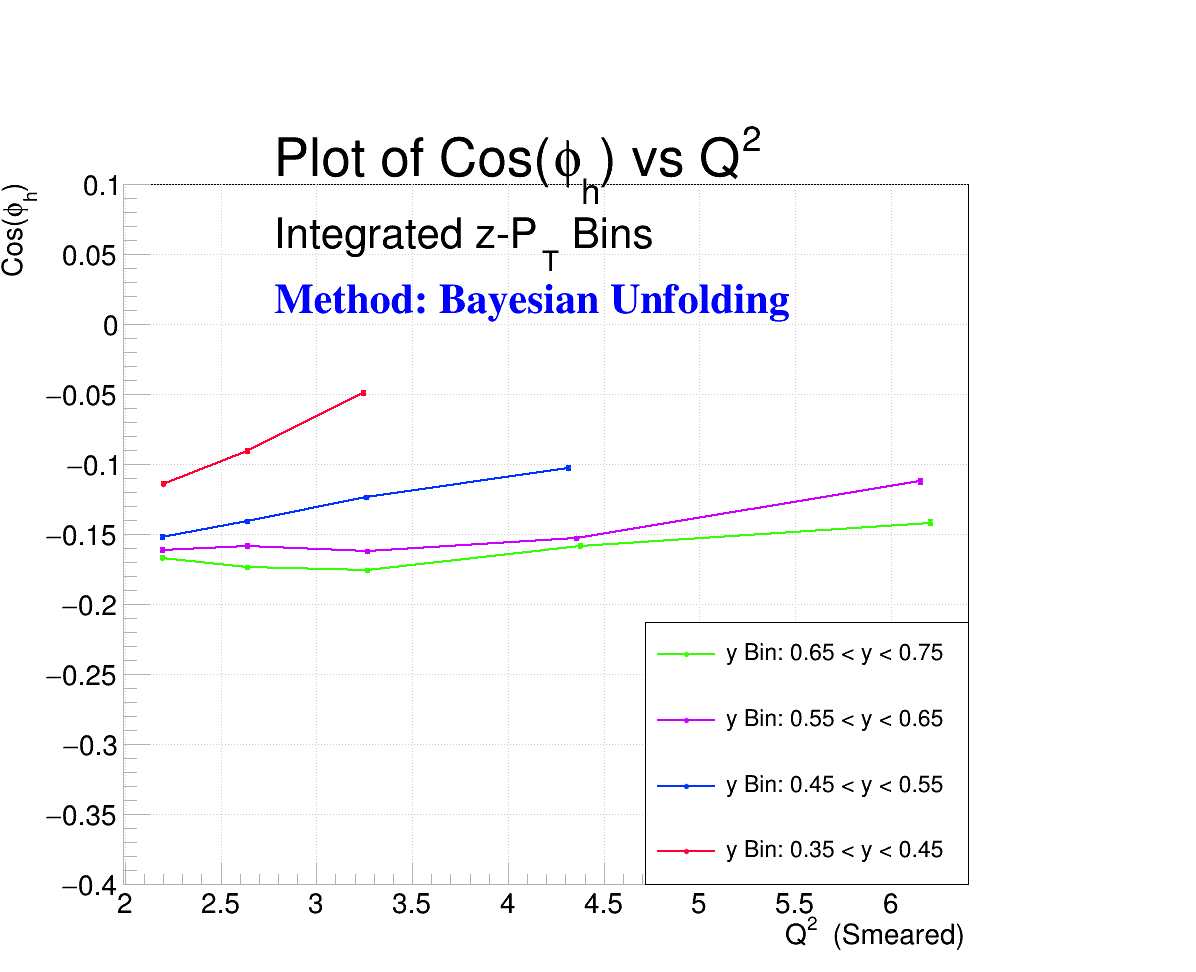

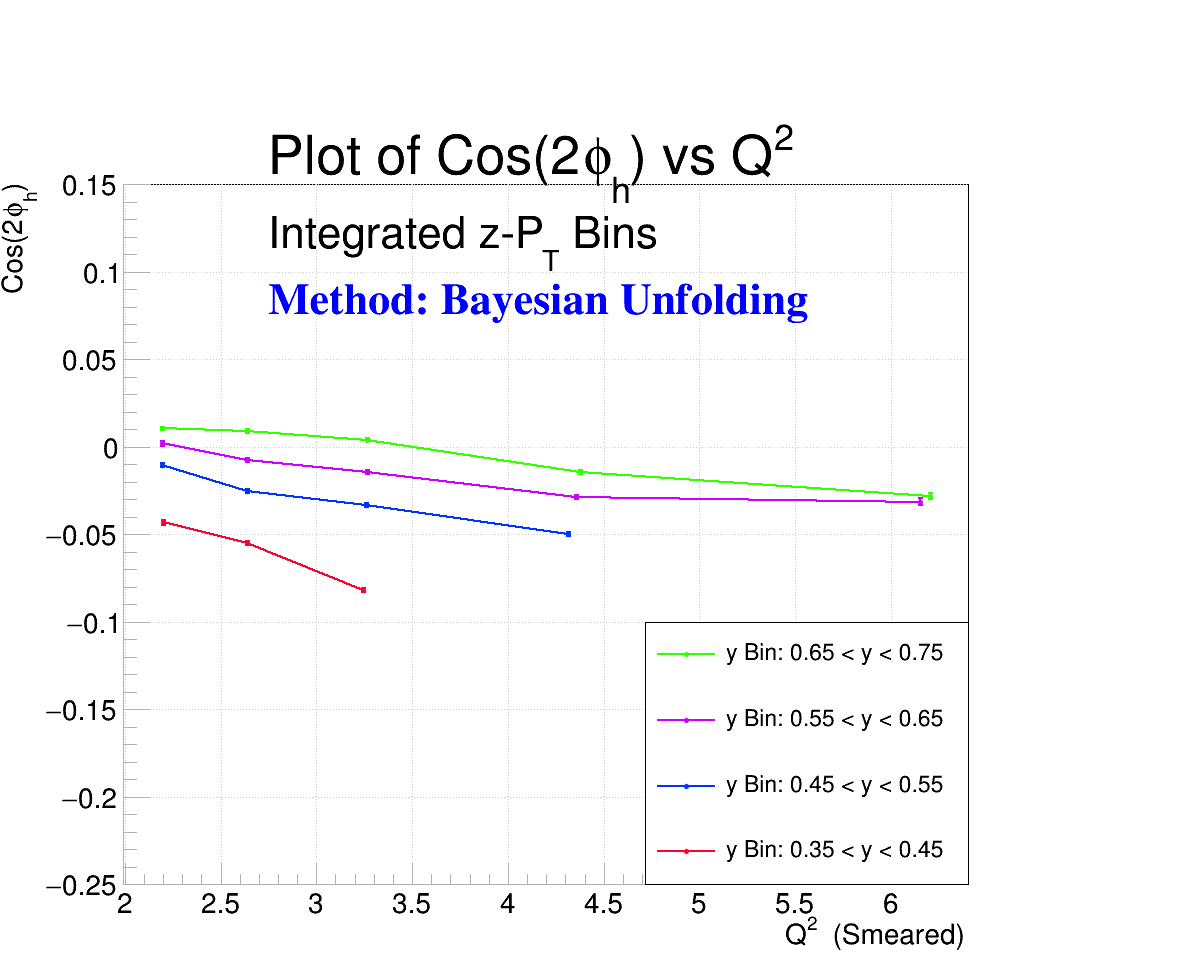

In [55]:
from array import array
ROOT.gStyle.SetTitleOffset(1.75,'y')

Histo_Type = "3D"
Histo_Type = "Skip"
Smear_Type = "SMEARED "
# Smear_Type = ""
Fit___Type = "Bin-by-Bin Correction"
Fit___Type = "Bayesian Unfolding"
# Fit___Type = "Generated Plot"
Parameters_to_Compare = ["B", "C"]
# Parameters_to_Compare = ["B"]

Comparison_Output = {}

y_bin_group_list = [1, 2, 3, 4]

# for Q2_y_Bin               in range(1, 18):
#     for z_pT_Bin           in range(1, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1] + 1):
# for Q2_y_Bin               in range(1, 4):
for Par___Type      in Parameters_to_Compare:
    for y_bin_group in y_bin_group_list:
        Q2_y_Bin_Groups = [1, 5, 9, 13, 16] if(y_bin_group == 1) else [2, 6, 10, 14, 17] if(y_bin_group == 2) else [3, 7, 11, 15] if(y_bin_group == 3) else [4, 8, 12]
        Comparison_Output[f"Par_{Par___Type}_Y_Bin_{y_bin_group}"] = []
        for Q2_y_Bin        in Q2_y_Bin_Groups:
            num_pT_cols = 7 if(Q2_y_Bin in [1, 9]) else 6 if(Q2_y_Bin in [2, 3, 4, 5, 6, 7, 10, 14, 16, 17]) else 5
            z_row = 0
            # for z_pT_Bin    in range(0, 1):
            for z_pT_Bin    in range(0, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1]+1):
                if(z_pT_Bin in [0]):
                    z_pT_Bin = "All"
                else:
                    if((z_pT_Bin-1)%num_pT_cols == 0):
                        z_row += 1
                    try:
                        type(Comparison_Output[f"Par_{Par___Type}_Y_Bin_{y_bin_group}_Q2_y_Bin_{Q2_y_Bin}_z_Bin_{z_row}"])
                    except:
                        Comparison_Output[f"Par_{Par___Type}_Y_Bin_{y_bin_group}_Q2_y_Bin_{Q2_y_Bin}_z_Bin_{z_row}"] = []
                if(skip_condition_z_pT_bins(Q2_Y_BIN=Q2_y_Bin, Z_PT_BIN=z_pT_Bin, BINNING_METHOD="Y_bin")):
                    continue
                Bin___Type = f"{Smear_Type}Q2-y Bin {Q2_y_Bin} - z-PT Bin {z_pT_Bin}"
                Moment_Value, Moment_Value_Error = Full_Search_Parameter(Parameter_File_str=file_content, Bin_Info=Bin___Type, Histogram_Type=Histo_Type, Fit_Type=Fit___Type, Parameter=Par___Type, return_err=True)
                if("ERROR" in [Moment_Value, Moment_Value_Error]):
                    print(f"{color.Error}{Bin___Type}{color.END}")
                    print(f"{color.Error}Moment_Value       = {Moment_Value}{color.END}")
                    print(f"{color.Error}Moment_Value_Error = {Moment_Value_Error}{color.END}")
                else:
                    if(z_pT_Bin in ["All", 0, "0"]):
                        Comparison_Output[f"Par_{Par___Type}_Y_Bin_{y_bin_group}"].append([float(Moment_Value),                                   float(Moment_Value_Error), Get_Bin_Center_Function(Q2_y_Bin=Q2_y_Bin, z_pT_Bin=z_pT_Bin, Variable="mean_Q2"), Get_Bin_Center_Function(Q2_y_Bin=Q2_y_Bin, z_pT_Bin=z_pT_Bin, Variable="Error_Q2"), Get_Bin_Center_Function(Q2_y_Bin=Q2_y_Bin, z_pT_Bin=z_pT_Bin, Variable="mean_pT"), Get_Bin_Center_Function(Q2_y_Bin=Q2_y_Bin, z_pT_Bin=z_pT_Bin, Variable="Error_pT")])
                    else:
                        Comparison_Output[f"Par_{Par___Type}_Y_Bin_{y_bin_group}_Q2_y_Bin_{Q2_y_Bin}_z_Bin_{z_row}"].append([float(Moment_Value), float(Moment_Value_Error), Get_Bin_Center_Function(Q2_y_Bin=Q2_y_Bin, z_pT_Bin=z_pT_Bin, Variable="mean_Q2"), Get_Bin_Center_Function(Q2_y_Bin=Q2_y_Bin, z_pT_Bin=z_pT_Bin, Variable="Error_Q2"), Get_Bin_Center_Function(Q2_y_Bin=Q2_y_Bin, z_pT_Bin=z_pT_Bin, Variable="mean_pT"), Get_Bin_Center_Function(Q2_y_Bin=Q2_y_Bin, z_pT_Bin=z_pT_Bin, Variable="Error_pT")])
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
                
                
# print(f"Comparison_Output = {Comparison_Output}")


y_values = {}
y_errors = {}
x_values = {}
x_errors = {}
n_points = {}
graph    = {}
canvas   = {}
multi_graph = {}
legend   = {}
multi_graph_canvas = {}

for Par___Type in Parameters_to_Compare:
    # Create a TMultiGraph to hold all the graphs for the current Par___Type
    multi_graph[Par___Type] = ROOT.TMultiGraph()
    multi_graph[Par___Type].SetName(Par___Type)
    TitleMG = "".join(["#splitline{#splitline{#scale[1.25]{Plot of ", "Cos(#phi_{h})" if(Par___Type in ["B"]) else "Cos(2#phi_{h})", " vs Q^{2}}}{Integrated z-P_{T} Bins}}{", str(root_color.Bold), "{#color[", str(root_color.Blue), "]{Method: ", str(Fit___Type), "}}}"])
    multi_graph[Par___Type].SetTitle(TitleMG)
    legend[Par___Type] = ROOT.TLegend(0.6, 0.1, 0.9, 0.4)
    for y_bin_group in y_bin_group_list:
        color_ii = ROOT.kSpring if(y_bin_group in [1]) else ROOT.kViolet if(y_bin_group in [2]) else ROOT.kAzure if(y_bin_group in [3]) else ROOT.kPink

        # Separate the data into y_values, y_errors, and x_values
        key = f"Par_{Par___Type}_Y_Bin_{y_bin_group}"
        y_values[key] = array('d', [point[0] for point in Comparison_Output[key]])
        y_errors[key] = array('d', [point[1] for point in Comparison_Output[key]])
        x_values[key] = array('d', [point[2] for point in Comparison_Output[key]])
        x_errors[key] = array('d', [point[3] for point in Comparison_Output[key]])

        # Create a TGraphErrors object
        n_points[key] = len(Comparison_Output[key])
        graph[key] = ROOT.TGraphErrors(n_points[key], x_values[key], y_values[key], x_errors[key], y_errors[key])

        # Customize the graph
        y_bin_title = round(0.75 - 0.1*(y_bin_group-1), 2)
        Binning_Title = "".join(["y Bin: ", str(round(y_bin_title-0.1, 2)), " < y < ", str(y_bin_title), " #topbar Integrated z-P_{T} Bins"])
        Title = "".join(["#splitline{#splitline{#scale[1.25]{Plot of ", "Cos(#phi_{h})" if(Par___Type in ["B"]) else "Cos(2#phi_{h})", "}}{", Binning_Title, "}}{", str(root_color.Bold), "{#color[", str(root_color.Blue), "]{Method: ", str(Fit___Type), "}}}"])
        graph[key].SetTitle(str(Title))
        graph[key].GetXaxis().SetTitle("".join(["Q^{2} ", " (Smeared)" if(Smear_Type not in [""]) else ""]))
        graph[key].GetYaxis().SetTitle("Cos(#phi_{h})" if(Par___Type in ["B"]) else "Cos(2#phi_{h})")
        graph[key].SetMarkerStyle(8)
        graph[key].SetMarkerSize(0.5)
        graph[key].SetLineWidth(2)
        graph[key].SetLineColor(color_ii)
        graph[key].SetMarkerColor(color_ii)

        # Add the graph to the TMultiGraph
        multi_graph[Par___Type].Add(graph[key])
        legend[Par___Type].AddEntry(graph[key], "".join(["y Bin: ", str(round(y_bin_title-0.1, 2)), " < y < ", str(y_bin_title)]), "lp")

        # Create a canvas and draw the individual graph
        canvas[key] = Canvas_Create(Name=key, Num_Columns=1, Num_Rows=1, Size_X=800, Size_Y=600, cd_Space=0)
        Draw_Canvas(canvas=canvas[key], cd_num=1, left_add=0.115, right_add=0.1, up_add=0.1, down_add=0.1)
        graph[key].Draw("APL")
        graph[key].GetYaxis().SetRangeUser(-0.9 if(str(Par___Type) in ["B"]) else -0.35, 0.2 if(str(Par___Type) in ["B"]) else 0.25)
#         canvas[key].Draw()

    # Create a canvas for the TMultiGraph for the current Par___Type
    multi_graph_canvas[Par___Type] = Canvas_Create(Name=f"Combined_Plot_{Par___Type}", Num_Columns=1, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
    Draw_Canvas(canvas=multi_graph_canvas[Par___Type], cd_num=1, left_add=0.115, right_add=0.1, up_add=0.1, down_add=0.1)
    multi_graph[Par___Type].Draw("APL")
    multi_graph[Par___Type].GetYaxis().SetRangeUser(-0.4 if(str(Par___Type) in ["B"]) else -0.25, 0.1 if(str(Par___Type) in ["B"]) else 0.15)
    multi_graph[Par___Type].GetXaxis().SetTitle("".join(["Q^{2} ", " (Smeared)" if(Smear_Type not in [""]) else ""]))
    multi_graph[Par___Type].GetYaxis().SetTitle("Cos(#phi_{h})" if(Par___Type in ["B"]) else "Cos(2#phi_{h})")
    legend[Par___Type].Draw()

    # Customize the combined plot (set title, axis labels, etc.)
    multi_graph_canvas[Par___Type].Update()
    multi_graph_canvas[Par___Type].Draw()
    save_name = f"Fit_Par_{Par___Type}_METHOD_SMEAR_phi_t_VS_Q2.png"
    save_name = save_name.replace("METHOD", "Bin" if(Fit___Type in ["Bin-by-Bin Correction"]) else "Bayesian" if(Fit___Type in ["Bayesian Unfolding"]) else "OTHER")
    save_name = save_name.replace("_SMEAR_", "_" if(Smear_Type in [""]) else "_Smear_")
    if(not True):
        print(f"{color.BBLUE}SAVING: {color.UNDERLINE}{save_name}{color.END}")
        multi_graph_canvas[Par___Type].SaveAs(save_name)
    else:
        print(f"Not Saving: {save_name}")
    
    




print("\nDONE")

In [131]:
# for ii in Comparison_Output:
#     print(ii)

In [70]:
# for ii in Comparison_Output:
#     if(("z_Bin_1" in ii) or ("z_Bin_2" in ii)):
#         print(ii)
#         print(f"\t{len(Comparison_Output[ii])}")
#         for jj in Comparison_Output[ii]:
#             print(f"\t{jj}")
data_points_temp = {}
for Par___Type in Parameters_to_Compare:
    for y_bin_group in y_bin_group_list:
        if(y_bin_group != 1):
            break
        Q2_y_Bin_Groups = [1, 5, 9, 13, 16] if(y_bin_group == 1) else [2, 6, 10, 14, 17] if(y_bin_group == 2) else [3, 7, 11, 15] if(y_bin_group == 3) else [4, 8, 12]
        color_count = 1
        data_points_temp[Par___Type] = []
        for Q2_y_Bin in Q2_y_Bin_Groups:
            if(Q2_y_Bin not in [1, 5]):
                break
            color_ii = ROOT.kOrange if(color_count in [1]) else ROOT.kSpring if(color_count in [2]) else ROOT.kViolet if(color_count in [3]) else ROOT.kAzure if(color_count in [4]) else ROOT.kPink
            color_count += 1
            for z_row in range(1, 3):
                # data_points_temp[Par___Type] = []
                try:
                    length = len(Comparison_Output[f"Par_{Par___Type}_Y_Bin_{y_bin_group}_Q2_y_Bin_{Q2_y_Bin}_z_Bin_{z_row}"])
                    print(f"Par_{Par___Type}_Y_Bin_{y_bin_group}_z_Bin_{z_row} --> {length}")
                    for ii in Comparison_Output[f"Par_{Par___Type}_Y_Bin_{y_bin_group}_Q2_y_Bin_{Q2_y_Bin}_z_Bin_{z_row}"]:
                        jj = ii.copy()
                        jj.append(color_ii+z_row+1)
                        data_points_temp[Par___Type].append(jj)
                except:
                    print(f"{color.Error}No 'Par_{Par___Type}_Y_Bin_{y_bin_group}_Q2_y_Bin_{Q2_y_Bin}_z_Bin_{z_row}' in 'Comparison_Output'{color.END}")
                    break

                
print(data_points_temp[Par___Type])

Par_B_Y_Bin_1_z_Bin_1 --> 7
Par_B_Y_Bin_1_z_Bin_2 --> 7
Par_B_Y_Bin_1_z_Bin_1 --> 6
Par_B_Y_Bin_1_z_Bin_2 --> 6
Par_C_Y_Bin_1_z_Bin_1 --> 7
Par_C_Y_Bin_1_z_Bin_2 --> 7
Par_C_Y_Bin_1_z_Bin_1 --> 6
Par_C_Y_Bin_1_z_Bin_2 --> 6
[[-0.002007265650594091, 0.0012212997809068551, 2.197, 0.0004086, 0.1529, 0.0001633, 802], [-0.027367014688600033, 0.010560786552300753, 2.195, 0.0003841, 0.2724, 9.62e-05, 802], [-0.03324286555606088, 0.008873821983665854, 2.193, 0.0003505, 0.3709, 8.81e-05, 802], [-0.014062348457285625, 0.006491684473036407, 2.193, 0.000347, 0.4696, 8.67e-05, 802], [0.001290066825009405, 0.0016095489558383468, 2.193, 0.0003519, 0.5731, 9.71e-05, 802], [0.008074656555833053, 0.006050178364523689, 2.192, 0.0003904, 0.6862, 0.0001175, 802], [0.051869755676008586, 0.005510449215873042, 2.193, 0.0003957, 0.8469, 0.00023, 802], [-0.0424719026146256, 0.011151974249761838, 2.196, 0.0003504, 0.1563, 0.000134, 803], [0.0015409871858237812, 0.0020155042550921557, 2.194, 0.0003288, 0.2724, 8.

In [65]:
# import ROOT
# from array import array

# # Example data for 3D plot with multiple points for each color and errors
# data_points = [
#     [10, 1, 0.2, 0.1, 0.1, 0.1, ROOT.kRed], [12, 1.5, 0.4, 0.1, 0.1, 0.1, ROOT.kRed], [14, 2, 0.6, 0.1, 0.1, 0.1, ROOT.kRed],
#     [15, 2, 1.2, 0.1, 0.1, 0.1, ROOT.kBlue], [17, 2.5, 1.4, 0.1, 0.1, 0.1, ROOT.kBlue], [19, 3, 1.6, 0.1, 0.1, 0.1, ROOT.kBlue],
#     [20, 3, 0.8, 0.1, 0.1, 0.1, ROOT.kGreen], [22, 3.5, 1.0, 0.1, 0.1, 0.1, ROOT.kGreen], [24, 4, 1.2, 0.1, 0.1, 0.1, ROOT.kGreen],
#     [25, 4, 1.5, 0.1, 0.1, 0.1, ROOT.kYellow], [27, 4.5, 1.7, 0.1, 0.1, 0.1, ROOT.kYellow], [29, 5, 1.9, 0.1, 0.1, 0.1, ROOT.kYellow],
#     [30, 5, 2.0, 0.1, 0.1, 0.1, ROOT.kMagenta], [32, 5.5, 2.2, 0.1, 0.1, 0.1, ROOT.kMagenta], [34, 6, 2.4, 0.1, 0.1, 0.1, ROOT.kMagenta]
# ]

# data_points = data_points_temp[Par___Type]

# # Extracting and grouping points by color
# grouped_points = {}
# for z, ez, x, ex, y, ey, color_ii in data_points:
#     if(color_ii not in grouped_points):
#         grouped_points[color_ii] = ([], [], [], [], [], [])
#     grouped_points[color_ii][0].append(x)
#     grouped_points[color_ii][1].append(y)
#     grouped_points[color_ii][2].append(z)
#     grouped_points[color_ii][3].append(ex)
#     grouped_points[color_ii][4].append(ey)
#     grouped_points[color_ii][5].append(ez)

# # Create a canvas and draw a base graph to set up the 3D view
# canvas = ROOT.TCanvas("canvas", "3D Graph", 800, 600)
# graph3d = ROOT.TGraph2D(len(data_points), array('d', [p[1] for p in data_points]), array('d', [p[0] for p in data_points]), array('d', [p[2] for p in data_points]))
# graph3d.SetTitle("3D Colored Plot;X-axis;Y-axis;Z-axis")
# graph3d.Draw("P0 text")

# # Initialize TView to ensure proper 3D drawing
# ROOT.gPad.Update()
# view = ROOT.gPad.GetView()
# if not view:
#     view = ROOT.TView.CreateView(1)
#     ROOT.gPad.SetView(view)

# # Draw points, lines, and error bars
# poly_markers = []
# poly_lines = []

# for color_ii, (x_vals, y_vals, z_vals, ex_vals, ey_vals, ez_vals) in grouped_points.items():
#     n_points = len(x_vals)
#     x_values = array('d',  x_vals)
#     y_values = array('d',  y_vals)
#     z_values = array('d',  z_vals)
#     ex_values = array('d', ex_vals)
#     ey_values = array('d', ey_vals)
#     ez_values = array('d', ez_vals)

#     # Create and draw TGraph2DErrors
#     graph3d_err = ROOT.TGraph2DErrors(n_points, x_values, y_values, z_values, ex_values, ey_values, ez_values)
#     graph3d_err.SetMarkerColor(color_ii)
#     graph3d_err.SetMarkerStyle(20)
#     graph3d_err.SetMarkerSize(1.5)
#     graph3d_err.Draw("P SAME text")

#     # Draw lines
#     polyline = ROOT.TPolyLine3D(n_points)
#     for i in range(n_points):
#         polyline.SetPoint(i, x_vals[i], y_vals[i], z_vals[i])
#     polyline.SetLineColor(color_ii)
#     polyline.SetLineWidth(2)
#     polyline.Draw("SAME")
#     poly_lines.append(polyline)

#     # Draw points separately to ensure they are on top of the lines
#     for x, y, z in zip(x_vals, y_vals, z_vals):
#         pm3d = ROOT.TPolyMarker3D(1)
#         pm3d.SetPoint(0, x, y, z)
#         pm3d.SetMarkerColor(color_ii)
#         pm3d.SetMarkerStyle(20)
#         pm3d.SetMarkerSize(1.5)
#         pm3d.Draw("SAME P")
#         poly_markers.append(pm3d)

# # Add grid lines in the x-y plane
# x_min, x_max = min([p[1] for p in data_points]), max([p[1] for p in data_points])
# y_min, y_max = min([p[0] for p in data_points]), max([p[0] for p in data_points])
# grid_lines = 10  # Number of grid lines

# # Draw vertical grid lines
# for i in range(grid_lines + 1):
#     x = x_min + (x_max - x_min) / grid_lines * i
#     line = ROOT.TPolyLine3D(2)
#     line.SetPoint(0, x, y_min, 0)
#     line.SetPoint(1, x, y_max, 0)
#     line.SetLineColor(17)
#     line.SetLineStyle(3)
#     line.Draw("SAME")
    
# # Draw horizontal grid lines
# for i in range(grid_lines + 1):
#     y = y_min + (y_max - y_min) / grid_lines * i
#     line = ROOT.TPolyLine3D(2)
#     line.SetPoint(0, x_min, y, 0)
#     line.SetPoint(1, x_max, y, 0)
#     line.SetLineColor(17)
#     line.SetLineStyle(3)
#     line.Draw("SAME")

# # Update the canvas to display all elements
# canvas.Update()
# canvas.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


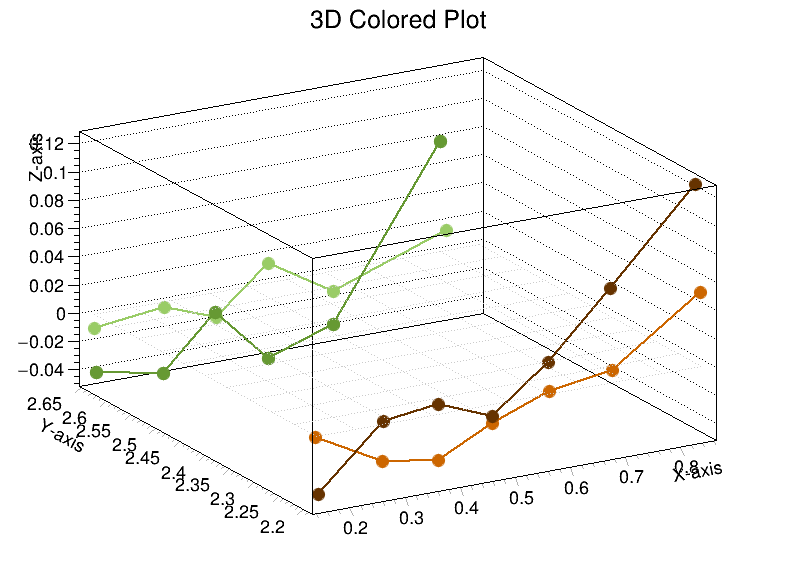

In [85]:
# import ROOT
# from array import array

# # Example data for 3D plot with multiple points for each color and errors
# data_points = [
#     [0.2, 0.1, 10, 1, 0.1, 0.1, ROOT.kRed], [0.4, 0.1, 12, 1.5, 0.1, 0.1, ROOT.kRed], [0.6, 0.1, 14, 2, 0.1, 0.1, ROOT.kRed],
#     [1.2, 0.1, 15, 2, 0.1, 0.1, ROOT.kBlue], [1.4, 0.1, 17, 2.5, 0.1, 0.1, ROOT.kBlue], [1.6, 0.1, 19, 3, 0.1, 0.1, ROOT.kBlue],
#     [0.8, 0.1, 20, 3, 0.1, 0.1, ROOT.kGreen], [1.0, 0.1, 22, 3.5, 0.1, 0.1, ROOT.kGreen], [1.2, 0.1, 24, 4, 0.1, 0.1, ROOT.kGreen],
#     [1.5, 0.1, 25, 4, 0.1, 0.1, ROOT.kYellow], [1.7, 0.1, 27, 4.5, 0.1, 0.1, ROOT.kYellow], [1.9, 0.1, 29, 5, 0.1, 0.1, ROOT.kYellow],
#     [2.0, 0.1, 30, 5, 0.1, 0.1, ROOT.kMagenta], [2.2, 0.1, 32, 5.5, 0.1, 0.1, ROOT.kMagenta], [2.4, 0.1, 34, 6, 0.1, 0.1, ROOT.kMagenta]
# ]

# data_points = data_points_temp[Par___Type]

# # Extracting and grouping points by color
# grouped_points = {}
# for z, ez, y, ey, x, ex, color_ii in data_points:
#     if color_ii not in grouped_points:
#         grouped_points[color_ii] = ([], [], [], [], [], [])
#     grouped_points[color_ii][0].append(x)
#     grouped_points[color_ii][1].append(y)
#     grouped_points[color_ii][2].append(z)
#     grouped_points[color_ii][3].append(ex)
#     grouped_points[color_ii][4].append(ey)
#     grouped_points[color_ii][5].append(ez)

# # Create a canvas and draw a base graph to set up the 3D view
# canvas = ROOT.TCanvas("canvas", "3D Graph", 800, 600)
# graph3d = ROOT.TGraph2D(len(data_points), array('d', [p[4] for p in data_points]), array('d', [p[2] for p in data_points]), array('d', [p[0] for p in data_points]))
# graph3d.SetTitle("3D Colored Plot;X-axis;Y-axis;Z-axis")
# graph3d.Draw("P0")

# # Initialize TView to ensure proper 3D drawing
# ROOT.gPad.Update()
# view = ROOT.gPad.GetView()
# if not view:
#     view = ROOT.TView.CreateView(1)
#     ROOT.gPad.SetView(view)

# # Function to convert 3D to 2D coordinates
# def convert_3d_to_2d(view, x, y, z):
#     pw = array('d', [x, y, z])
#     pn = array('d', [0.0, 0.0, 0.0])
#     view.WCtoNDC(pw, pn)
#     return pn[0], pn[1]

# # Set axis ranges
# graph3d.GetXaxis().SetLimits(0,    10)  # X-axis range
# graph3d.GetYaxis().SetRangeUser(0, 40)  # Y-axis range
# graph3d.GetZaxis().SetRangeUser(-0.9 if(str(Par___Type) in ["B"]) else -0.35, 0.2 if(str(Par___Type) in ["B"]) else 0.25)  # Z-axis range

# # Draw points, lines, and error bars
# poly_markers = []
# poly_lines = []
# text_all = {}
# for color_ii, (x_vals, y_vals, z_vals, ex_vals, ey_vals, ez_vals) in grouped_points.items():
#     n_points = len(x_vals)
#     x_values = array('d', x_vals)
#     y_values = array('d', y_vals)
#     z_values = array('d', z_vals)
#     ex_values = array('d', ex_vals)
#     ey_values = array('d', ey_vals)
#     ez_values = array('d', ez_vals)

#     # Create and draw TGraph2DErrors
#     graph3d_err = ROOT.TGraph2DErrors(n_points, x_values, y_values, z_values, ex_values, ey_values, ez_values)
#     graph3d_err.SetMarkerColor(color_ii)
#     graph3d_err.SetMarkerStyle(20)
#     graph3d_err.SetMarkerSize(1.5)
#     graph3d_err.Draw("P SAME")

#     # Draw lines
#     polyline = ROOT.TPolyLine3D(n_points)
#     for i in range(n_points):
#         polyline.SetPoint(i, x_vals[i], y_vals[i], z_vals[i])
#     polyline.SetLineColor(color_ii)
#     polyline.SetLineWidth(2)
#     polyline.Draw("SAME")
#     poly_lines.append(polyline)

#     # Draw points separately to ensure they are on top of the lines
#     for x, y, z in zip(x_vals, y_vals, z_vals):
#         pm3d = ROOT.TPolyMarker3D(1)
#         pm3d.SetPoint(0, x, y, z)
#         pm3d.SetMarkerColor(color_ii)
#         pm3d.SetMarkerStyle(20)
#         pm3d.SetMarkerSize(1.5)
#         pm3d.Draw("SAME P")
#         poly_markers.append(pm3d)

#         # Convert 3D coordinates to 2D
#         winx, winy = convert_3d_to_2d(view, x, y, z)

#         # Add text labels with coordinates
#         label = f"(pT:{x:.3f}, Q2:{y:.3f}, Moment:{z:.3f})"
#         text_all[label] = ROOT.TText(winx, winy, label)
#         text_all[label].SetTextSize(0.02)
# #         text_all[label].Draw()

# # Add grid lines in the x-y plane
# x_min, x_max = min([p[4] for p in data_points]), max([p[4] for p in data_points])
# y_min, y_max = min([p[2] for p in data_points]), max([p[2] for p in data_points])
# grid_lines = 10  # Number of grid lines

# # Draw vertical grid lines
# for i in range(grid_lines + 1):
#     x = x_min + (x_max - x_min) / grid_lines * i
#     line = ROOT.TPolyLine3D(2)
#     line.SetPoint(0, x, y_min, 0)
#     line.SetPoint(1, x, y_max, 0)
#     line.SetLineColor(17)
#     line.SetLineStyle(3)
#     line.Draw("SAME")
    
# # Draw horizontal grid lines
# for i in range(grid_lines + 1):
#     y = y_min + (y_max - y_min) / grid_lines * i
#     line = ROOT.TPolyLine3D(2)
#     line.SetPoint(0, x_min, y, 0)
#     line.SetPoint(1, x_max, y, 0)
#     line.SetLineColor(17)
#     line.SetLineStyle(3)
#     line.Draw("SAME")

    
    
# canvas.Update()

# # Set axis ranges
# graph3d.GetXaxis().SetRangeUser(0, 1.1)  # X-axis range
# graph3d.GetYaxis().SetRangeUser(2, 7)  # Y-axis range
# graph3d.GetZaxis().SetRangeUser(-0.9 if(str(Par___Type) in ["B"]) else -0.35, 0.2 if(str(Par___Type) in ["B"]) else 0.25)  # Z-axis range

# # Update the canvas to display all elements
# canvas.Update()
# canvas.Draw()

In [ ]:
import ROOT
from array import array

# Example data for 3D plot with multiple points for each color and errors
# data_points = [
#     [0.2, 0.1, 3, 1, 0.1, 0.1, ROOT.kRed], [0.4, 0.1, 4, 1.5, 0.2, 0.1, ROOT.kRed], [0.6, 0.1, 5, 2, 0.3, 0.1, ROOT.kRed],
#     [1.2, 0.1, 3.5, 2, 0.4, 0.1, ROOT.kBlue], [1.4, 0.1, 4.5, 2.5, 0.5, 0.1, ROOT.kBlue], [1.6, 0.1, 5.5, 3, 0.6, 0.1, ROOT.kBlue],
#     [0.8, 0.1, 2.5, 3, 0.7, 0.1, ROOT.kGreen], [1.0, 0.1, 3.5, 3.5, 0.8, 0.1, ROOT.kGreen], [1.2, 0.1, 4.5, 4, 0.9, 0.1, ROOT.kGreen],
#     [1.5, 0.1, 2, 4, 1.0, 0.1, ROOT.kYellow], [1.7, 0.1, 3, 4.5, 1.1, 0.1, ROOT.kYellow], [1.9, 0.1, 4, 5, 1.2, 0.1, ROOT.kYellow],
#     [2.0, 0.1, 2.5, 5, 1.3, 0.1, ROOT.kMagenta], [2.2, 0.1, 3.5, 5.5, 1.4, 0.1, ROOT.kMagenta], [2.4, 0.1, 4.5, 6, 1.5, 0.1, ROOT.kMagenta]
# ]
data_points = data_points_temp[Par___Type]
# Extracting and grouping points by color
grouped_points = {}
for z, ez, y, ey, x, ex, color_ii in data_points:
    if color_ii not in grouped_points:
        grouped_points[color_ii] = ([], [], [], [], [], [])
    grouped_points[color_ii][0].append(x)
    grouped_points[color_ii][1].append(y)
    grouped_points[color_ii][2].append(z)
    grouped_points[color_ii][3].append(ex)
    grouped_points[color_ii][4].append(ey)
    grouped_points[color_ii][5].append(ez)

# Create a canvas
canvas = ROOT.TCanvas("canvas", "3D Graph", 1200, 1000)

# Create an empty histogram with the desired axis ranges
min_x, max_x = 0, 1.1 # Q2 range
min_y, max_y = 2, 7   # pT range
min_z, max_z = -0.9 if(str(Par___Type) in ["B"]) else -0.35, 0.2 if(str(Par___Type) in ["B"]) else 0.25


y_bin_title = round(0.75 - 0.1*(y_bin_group-1), 2)
Binning_Title = "".join(["y Bin: ", str(round(y_bin_title-0.1, 2)), " < y < ", str(y_bin_title)])
Binning_Title = "Test"
Title = "".join(["#splitline{#splitline{#scale[1.25]{Plot of ", "Cos(#phi_{h})" if(Par___Type in ["B"]) else "Cos(2#phi_{h})", " vs Q^{2} vs P_{T}}}{", Binning_Title, "}}{", str(root_color.Bold), "{#color[", str(root_color.Blue), "]{Method: ", str(Fit___Type), "}}}"])
Title = "".join([str(Title), "; Q^{2} ", " (Smeared)" if(Smear_Type not in [""]) else ""])
Title = "".join([str(Title), "; P_{T} ", " (Smeared)" if(Smear_Type not in [""]) else ""])
Title = "".join([str(Title), "; ", "Cos(#phi_{h})" if(Par___Type in ["B"]) else "Cos(2#phi_{h})")

hist = ROOT.TH3F("hist", Title, 10, min_x, max_x, 10, min_y, max_y, 10, min_z, max_z)
hist.Draw("BOX")

# Initialize TView to ensure proper 3D drawing
ROOT.gPad.Update()
view = ROOT.gPad.GetView()
if not view:
    view = ROOT.TView.CreateView(1)
    ROOT.gPad.SetView(view)

# Create TGraph2D
graph3d = ROOT.TGraph2D(len(data_points), array('d', [p[4] for p in data_points]), array('d', [p[2] for p in data_points]), array('d', [p[0] for p in data_points]))

# Draw the TGraph2D on top of the histogram
graph3d.Draw("P0 SAME")

# Function to convert 3D to 2D coordinates
def convert_3d_to_2d(view, x, y, z):
    pw = array('d', [x, y, z])
    pn = array('d', [0.0, 0.0, 0.0])
    view.WCtoNDC(pw, pn)
    return pn[0], pn[1]

# Draw points, lines, and error bars
poly_markers = []
poly_lines = []

for color_ii, (x_vals, y_vals, z_vals, ex_vals, ey_vals, ez_vals) in grouped_points.items():
    n_points = len(x_vals)
    x_values = array('d', x_vals)
    y_values = array('d', y_vals)
    z_values = array('d', z_vals)
    ex_values = array('d', ex_vals)
    ey_values = array('d', ey_vals)
    ez_values = array('d', ez_vals)

    # Create and draw TGraph2DErrors
    graph3d_err = ROOT.TGraph2DErrors(n_points, x_values, y_values, z_values, ex_values, ey_values, ez_values)
    graph3d_err.SetMarkerColor(color_ii)
    graph3d_err.SetMarkerStyle(20)
    graph3d_err.SetMarkerSize(1.5)
    graph3d_err.Draw("P SAME")

    # Draw lines
    polyline = ROOT.TPolyLine3D(n_points)
    for i in range(n_points):
        polyline.SetPoint(i, x_vals[i], y_vals[i], z_vals[i])
    polyline.SetLineColor(color_ii)
    polyline.SetLineWidth(2)
    polyline.Draw("SAME")
    poly_lines.append(polyline)

    # Draw points separately to ensure they are on top of the lines
    for x, y, z in zip(x_vals, y_vals, z_vals):
        pm3d = ROOT.TPolyMarker3D(1)
        pm3d.SetPoint(0, x, y, z)
        pm3d.SetMarkerColor(color_ii)
        pm3d.SetMarkerStyle(20)
        pm3d.SetMarkerSize(1.5)
        pm3d.Draw("SAME P")
        poly_markers.append(pm3d)

        # Convert 3D coordinates to 2D
        winx, winy = convert_3d_to_2d(view, x, y, z)

        # Add text labels with coordinates
        label = f"({x:.1f}, {y:.1f}, {z:.1f})"
        text = ROOT.TText(winx, winy, label)
        text.SetTextSize(0.02)
        text.Draw()


grid_lines = 10  # Number of grid lines

# Draw vertical grid lines
for i in range(grid_lines + 1):
    x = min_x + (max_x - min_x) / grid_lines * i
    line = ROOT.TPolyLine3D(2)
    line.SetPoint(0, x, min_y, min_z)
    line.SetPoint(1, x, max_y, min_z)
    line.SetLineColor(17)
    line.SetLineStyle(3)
    line.Draw("SAME")
    
# Draw horizontal grid lines
for i in range(grid_lines + 1):
    y = min_y + (max_y - min_y) / grid_lines * i
    line = ROOT.TPolyLine3D(2)
    line.SetPoint(0, min_x, y, min_z)
    line.SetPoint(1, max_x, y, min_z)
    line.SetLineColor(17)
    line.SetLineStyle(3)
    line.Draw("SAME")

# Update the canvas to display all elements
canvas.Update()
canvas.Draw()


In [ ]:
stop

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


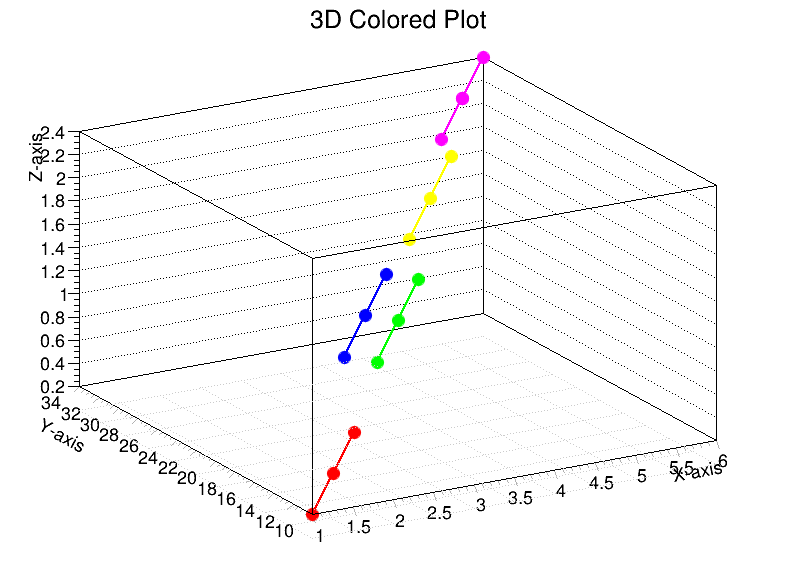

In [11]:
import ROOT
from array import array

# Example data for 3D plot with multiple points for each color and errors
data_points = [
    [10, 1, 0.2, 0.1, 0.1, 0.1, ROOT.kRed], [12, 1.5, 0.4, 0.1, 0.1, 0.1, ROOT.kRed], [14, 2, 0.6, 0.1, 0.1, 0.1, ROOT.kRed],
    [15, 2, 1.2, 0.1, 0.1, 0.1, ROOT.kBlue], [17, 2.5, 1.4, 0.1, 0.1, 0.1, ROOT.kBlue], [19, 3, 1.6, 0.1, 0.1, 0.1, ROOT.kBlue],
    [20, 3, 0.8, 0.1, 0.1, 0.1, ROOT.kGreen], [22, 3.5, 1.0, 0.1, 0.1, 0.1, ROOT.kGreen], [24, 4, 1.2, 0.1, 0.1, 0.1, ROOT.kGreen],
    [25, 4, 1.5, 0.1, 0.1, 0.1, ROOT.kYellow], [27, 4.5, 1.7, 0.1, 0.1, 0.1, ROOT.kYellow], [29, 5, 1.9, 0.1, 0.1, 0.1, ROOT.kYellow],
    [30, 5, 2.0, 0.1, 0.1, 0.1, ROOT.kMagenta], [32, 5.5, 2.2, 0.1, 0.1, 0.1, ROOT.kMagenta], [34, 6, 2.4, 0.1, 0.1, 0.1, ROOT.kMagenta]
]

# Extracting and grouping points by color
grouped_points = {}
for y, x, z, ex, ey, ez, color_ii in data_points:
    if color_ii not in grouped_points:
        grouped_points[color_ii] = ([], [], [], [], [], [])
    grouped_points[color_ii][0].append(x)
    grouped_points[color_ii][1].append(y)
    grouped_points[color_ii][2].append(z)
    grouped_points[color_ii][3].append(ex)
    grouped_points[color_ii][4].append(ey)
    grouped_points[color_ii][5].append(ez)

# Create a canvas and draw a base graph to set up the 3D view
canvas = ROOT.TCanvas("canvas", "3D Graph", 800, 600)
graph3d = ROOT.TGraph2D(len(data_points), array('d', [p[1] for p in data_points]), array('d', [p[0] for p in data_points]), array('d', [p[2] for p in data_points]))
graph3d.SetTitle("3D Colored Plot;X-axis;Y-axis;Z-axis")
graph3d.Draw("P0")

# Initialize TView to ensure proper 3D drawing
ROOT.gPad.Update()
view = ROOT.gPad.GetView()
if not view:
    view = ROOT.TView.CreateView(1)
    ROOT.gPad.SetView(view)

# Draw points, lines, and error bars
poly_markers = []
poly_lines = []

for color_ii, (x_vals, y_vals, z_vals, ex_vals, ey_vals, ez_vals) in grouped_points.items():
    n_points = len(x_vals)
    x_values = array('d', x_vals)
    y_values = array('d', y_vals)
    z_values = array('d', z_vals)
    ex_values = array('d', ex_vals)
    ey_values = array('d', ey_vals)
    ez_values = array('d', ez_vals)

    # Create and draw TGraph2DErrors
    graph3d_err = ROOT.TGraph2DErrors(n_points, x_values, y_values, z_values, ex_values, ey_values, ez_values)
    graph3d_err.SetMarkerColor(color_ii)
    graph3d_err.SetMarkerStyle(20)
    graph3d_err.SetMarkerSize(1.5)
    graph3d_err.Draw("P SAME")

    # Draw lines
    polyline = ROOT.TPolyLine3D(n_points)
    for i in range(n_points):
        polyline.SetPoint(i, x_vals[i], y_vals[i], z_vals[i])
    polyline.SetLineColor(color_ii)
    polyline.SetLineWidth(2)
    polyline.Draw("SAME")
    poly_lines.append(polyline)

    # Draw points separately to ensure they are on top of the lines
    for x, y, z in zip(x_vals, y_vals, z_vals):
        pm3d = ROOT.TPolyMarker3D(1)
        pm3d.SetPoint(0, x, y, z)
        pm3d.SetMarkerColor(color_ii)
        pm3d.SetMarkerStyle(20)
        pm3d.SetMarkerSize(1.5)
        pm3d.Draw("SAME P")
        poly_markers.append(pm3d)

# Add grid lines in the x-y plane
x_min, x_max = min([p[1] for p in data_points]), max([p[1] for p in data_points])
y_min, y_max = min([p[0] for p in data_points]), max([p[0] for p in data_points])
grid_lines = 10  # Number of grid lines

# Draw vertical grid lines
for i in range(grid_lines + 1):
    x = x_min + (x_max - x_min) / grid_lines * i
    line = ROOT.TPolyLine3D(2)
    line.SetPoint(0, x, y_min, 0)
    line.SetPoint(1, x, y_max, 0)
    line.SetLineColor(17)
    line.SetLineStyle(3)
    line.Draw("SAME")
    
# Draw horizontal grid lines
for i in range(grid_lines + 1):
    y = y_min + (y_max - y_min) / grid_lines * i
    line = ROOT.TPolyLine3D(2)
    line.SetPoint(0, x_min, y, 0)
    line.SetPoint(1, x_max, y, 0)
    line.SetLineColor(17)
    line.SetLineStyle(3)
    line.Draw("SAME")

# Update the canvas to display all elements
canvas.Update()
canvas.Draw()

In [66]:
from MyCommonAnalysisFunction_richcap import *
for Q2_y_Bin     in range(1, 18):
    num_pT_cols = 7 if(Q2_y_Bin in [1, 9]) else 6 if(Q2_y_Bin in [2, 3, 4, 5, 6, 7, 10, 14, 16, 17]) else 5
    z_row = 0
    for z_pT_Bin in range(0, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1]+1):
        if((z_pT_Bin not in ["All", 0, "0"]) and ((z_pT_Bin-1)%num_pT_cols == 0)):
            z_row += 1
            print("")
        if(skip_condition_z_pT_bins(Q2_Y_BIN=Q2_y_Bin, Z_PT_BIN=z_pT_Bin, BINNING_METHOD="Y_bin")):
            continue
        if(z_pT_Bin in [0]):
            z_pT_Bin = "All"
        Bin___Type = f"Q2-y Bin {Q2_y_Bin} - z-PT Bin {z_pT_Bin}"
        if(z_pT_Bin not in ["All", 0, "0"]):
            Bin___Type = f"{Bin___Type}{color.BOLD} \t- Row {z_row}{color.END}"
            # if(z_pT_Bin%num_pT_cols == 0):
            #     z_row += 1
            #     print("")
        else:
            print("")
        print(Bin___Type)


Q2-y Bin 1 - z-PT Bin All

Q2-y Bin 1 - z-PT Bin 1 	- Row 1
Q2-y Bin 1 - z-PT Bin 2 	- Row 1
Q2-y Bin 1 - z-PT Bin 3 	- Row 1
Q2-y Bin 1 - z-PT Bin 4 	- Row 1
Q2-y Bin 1 - z-PT Bin 5 	- Row 1
Q2-y Bin 1 - z-PT Bin 6 	- Row 1
Q2-y Bin 1 - z-PT Bin 7 	- Row 1

Q2-y Bin 1 - z-PT Bin 8 	- Row 2
Q2-y Bin 1 - z-PT Bin 9 	- Row 2
Q2-y Bin 1 - z-PT Bin 10 	- Row 2
Q2-y Bin 1 - z-PT Bin 11 	- Row 2
Q2-y Bin 1 - z-PT Bin 12 	- Row 2
Q2-y Bin 1 - z-PT Bin 13 	- Row 2
Q2-y Bin 1 - z-PT Bin 14 	- Row 2

Q2-y Bin 1 - z-PT Bin 15 	- Row 3
Q2-y Bin 1 - z-PT Bin 16 	- Row 3
Q2-y Bin 1 - z-PT Bin 17 	- Row 3
Q2-y Bin 1 - z-PT Bin 18 	- Row 3
Q2-y Bin 1 - z-PT Bin 19 	- Row 3
Q2-y Bin 1 - z-PT Bin 20 	- Row 3

Q2-y Bin 1 - z-PT Bin 22 	- Row 4
Q2-y Bin 1 - z-PT Bin 23 	- Row 4
Q2-y Bin 1 - z-PT Bin 24 	- Row 4
Q2-y Bin 1 - z-PT Bin 25 	- Row 4
Q2-y Bin 1 - z-PT Bin 26 	- Row 4

Q2-y Bin 1 - z-PT Bin 29 	- Row 5
Q2-y Bin 1 - z-PT Bin 30 	- Row 5
Q2-y Bin 1 - z-PT Bin 31 	- Row 5
Q2-y Bin 1 - z-PT Bin 32 

In [63]:
skip_condition_z_pT_bins(Q2_Y_BIN=1, Z_PT_BIN=36, BINNING_METHOD="Y_bin")

False

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


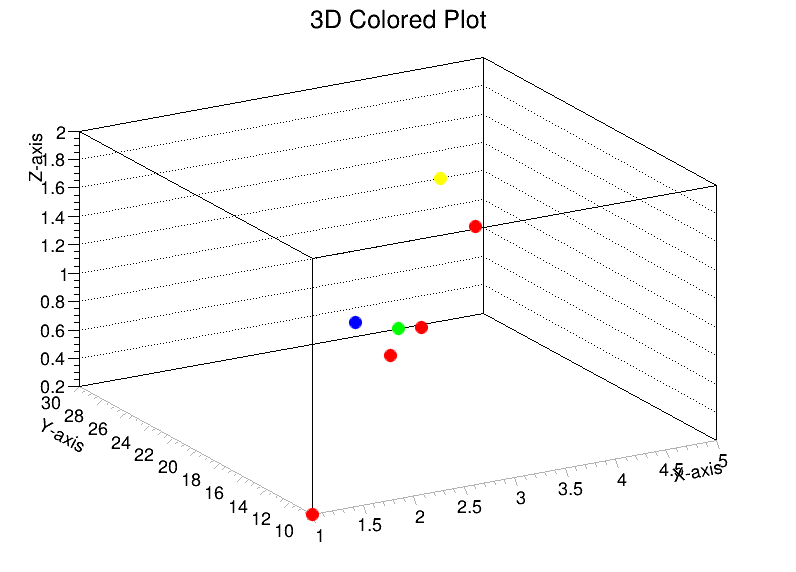

In [51]:
import ROOT
from array import array

# Example data for 3D plot
data_points = [
    [10, 1, 0.2, ROOT.kRed],  # [y_value, x_value, z_value, color]
    [12, 2, 1.1, ROOT.kRed],
    [18, 3, 0.9, ROOT.kRed],
    [22, 4, 1.3, ROOT.kRed],
    [30, 5, 2.0, ROOT.kMagenta],
    [15, 2, 1.2, ROOT.kBlue],
    [20, 3, 0.8, ROOT.kGreen],
    [25, 4, 1.5, ROOT.kYellow],
    [30, 5, 2.0, ROOT.kMagenta]
]

# Extracting x, y, and z values from data_points
x_values = array('d', [point[1] for point in data_points])
y_values = array('d', [point[0] for point in data_points])
z_values = array('d', [point[2] for point in data_points])
colors = [point[3] for point in data_points]

# Create TGraph2D to define the axis range
graph3d = ROOT.TGraph2D(len(data_points), x_values, y_values, z_values)
graph3d.SetTitle("3D Colored Plot;X-axis;Y-axis;Z-axis")

# Create a canvas and draw the graph to set up the view
canvas = ROOT.TCanvas("canvas", "3D Graph", 800, 600)
graph3d.Draw("P0")

# Initialize TView to ensure proper 3D drawing
ROOT.gPad.Update()
view = ROOT.gPad.GetView()
if not view:
    view = ROOT.TView.CreateView(1)
    ROOT.gPad.SetView(view)

# Keep a list of TPolyMarker3D to ensure they are not garbage collected
poly_markers = []

# Draw points with specific colors using TPolyMarker3D
for i, (y, x, z, color) in enumerate(data_points):
    pm3d = ROOT.TPolyMarker3D(1)
    pm3d.SetPoint(0, x, y, z)
    pm3d.SetMarkerColor(color)
    pm3d.SetMarkerStyle(20)
    pm3d.SetMarkerSize(1.5)
    pm3d.Draw("SAME PL")  # Draw each point separately
    poly_markers.append(pm3d)  # Store the marker to prevent garbage collection

# Update the canvas to display all elements
canvas.Update()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


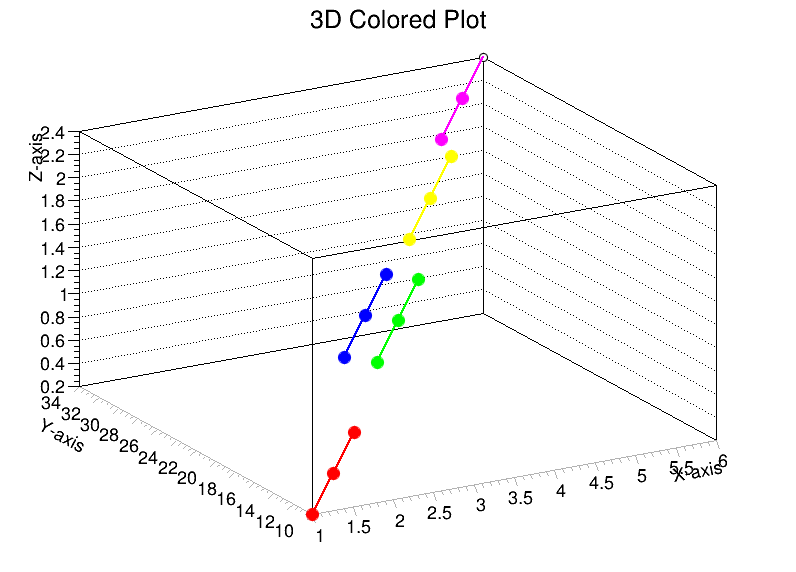

In [52]:
import ROOT
from array import array

# Example data for 3D plot with multiple points for each color
data_points = [
    [10, 1, 0.2, ROOT.kRed], [12, 1.5, 0.4, ROOT.kRed], [14, 2, 0.6, ROOT.kRed],
    [15, 2, 1.2, ROOT.kBlue], [17, 2.5, 1.4, ROOT.kBlue], [19, 3, 1.6, ROOT.kBlue],
    [20, 3, 0.8, ROOT.kGreen], [22, 3.5, 1.0, ROOT.kGreen], [24, 4, 1.2, ROOT.kGreen],
    [25, 4, 1.5, ROOT.kYellow], [27, 4.5, 1.7, ROOT.kYellow], [29, 5, 1.9, ROOT.kYellow],
    [30, 5, 2.0, ROOT.kMagenta], [32, 5.5, 2.2, ROOT.kMagenta], [34, 6, 2.4, ROOT.kMagenta]
]

# Extracting and grouping points by color
grouped_points = {}
for y, x, z, color in data_points:
    if color not in grouped_points:
        grouped_points[color] = ([], [], [])
    grouped_points[color][0].append(x)
    grouped_points[color][1].append(y)
    grouped_points[color][2].append(z)

# Create a canvas and draw a base graph to set up the 3D view
canvas = ROOT.TCanvas("canvas", "3D Graph", 800, 600)
graph3d = ROOT.TGraph2D(len(data_points), array('d', [p[1] for p in data_points]), array('d', [p[0] for p in data_points]), array('d', [p[2] for p in data_points]))
graph3d.SetTitle("3D Colored Plot;X-axis;Y-axis;Z-axis")
graph3d.Draw("P0")

# Initialize TView to ensure proper 3D drawing
ROOT.gPad.Update()
view = ROOT.gPad.GetView()
if not view:
    view = ROOT.TView.CreateView(1)
    ROOT.gPad.SetView(view)

# Draw points and lines
poly_markers = []
poly_lines = []

for color, (x_vals, y_vals, z_vals) in grouped_points.items():
    # Draw points
    for x, y, z in zip(x_vals, y_vals, z_vals):
        pm3d = ROOT.TPolyMarker3D(1)
        pm3d.SetPoint(0, x, y, z)
        pm3d.SetMarkerColor(color)
        pm3d.SetMarkerStyle(20)
        pm3d.SetMarkerSize(1.5)
        pm3d.Draw("SAME P")
        poly_markers.append(pm3d)

    # Draw lines
    polyline = ROOT.TPolyLine3D(len(x_vals))
    for i, (x, y, z) in enumerate(zip(x_vals, y_vals, z_vals)):
        polyline.SetPoint(i, x, y, z)
    polyline.SetLineColor(color)
    polyline.SetLineWidth(2)
    polyline.Draw("SAME")
    poly_lines.append(polyline)

# Update the canvas to display all elements
canvas.Update()
canvas.Draw()